<a href="https://colab.research.google.com/github/SpenBobCat/Computer_Science/blob/main/3_2_Creating_Data_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2 Creating Data Types.

University of Princeton - Computer Science: An Interdisciplinary Approach - Coursera

By: Michael Spencer 6/21/2023

## Exercises.

### 4. Rectangle.java.

Develop an implementation Rectangle.java of your Rectangle API from Exercise 3.2.1 that that represents rectangles with the x- and y-coordinates of their lower-left and upper-right corners. Do not change the API.



```
public class Rectangle {
    private final double x1, y1; // lower-left corner
    private final double x2, y2; // upper-right corner

    public Rectangle(double x1, double y1, double x2, double y2) {
        if (x2 <= x1 || y2 <= y1) {
            throw new IllegalArgumentException("Invalid rectangle coordinates.");
        }

        this.x1 = x1;
        this.y1 = y1;
        this.x2 = x2;
        this.y2 = y2;
    }

    public double area() {
        return (x2 - x1) * (y2 - y1);
    }

    public double perimeter() {
        return 2 * ((x2 - x1) + (y2 - y1));
    }

    public boolean contains(double x, double y) {
        return x >= x1 && x <= x2 && y >= y1 && y <= y2;
    }

    public boolean intersects(Rectangle other) {
        return x1 < other.x2 && x2 > other.x1 && y1 < other.y2 && y2 > other.y1;
    }

    public static void main(String[] args) {
        Rectangle rectangle = new Rectangle(0, 0, 4, 3);
        System.out.println("Area: " + rectangle.area());
        System.out.println("Perimeter: " + rectangle.perimeter());
        System.out.println("Contains (1, 1): " + rectangle.contains(1, 1));

        Rectangle otherRectangle = new Rectangle(2, 2, 5, 4);
        System.out.println("Intersects with (2, 2, 5, 4): " + rectangle.intersects(otherRectangle));
    }
}
```

In this implementation:

- The Rectangle class represents a rectangle with its lower-left corner defined by the coordinates $(x_1, y_1)$ and its upper-right corner defined by the coordinates $(x_2, y_2)$.
- The constructor validates that the rectangle is valid (with $x_2$ and $y_2$ greater than $x_1$ and $y_1$, respectively) and throws an IllegalArgumentException if the coordinates are invalid.
- The class provides methods to calculate the area and perimeter of the rectangle, check if a point is contained within the rectangle, and determine if the rectangle intersects with another rectangle.
- The **main** method demonstrates the usage of these methods with sample rectangles.

### 7. Rational.java.

Implement a data type Rational.java numbers that supports addition, subtraction, multiplication, and division.

Rational API:

```
public class Rational
-------------------------------------------------
Rational(int numerator, int denominator)
Rational plus(Rationsl b) | sum of this number and b
Rational minus(Rational b) | difference of this number and b
Rational times(Rational b) | product of this number and b
Rational divides(Rational b)| quotient of this number and b
String toString()          | string representation
```



```
public class Rational {
    private final int numerator;
    private final int denominator;

    public Rational(int numerator, int denominator) {
        if (denominator == 0) {
            throw new IllegalArgumentException("Denominator cannot be zero.");
        }

        int gcd = gcd(Math.abs(numerator), Math.abs(denominator));
        int sign = (numerator < 0) ? -1 : 1;

        this.numerator = sign * Math.abs(numerator) / gcd;
        this.denominator = Math.abs(denominator) / gcd;
    }

    private int gcd(int a, int b) {
        if (b == 0) {
            return a;
        }
        return gcd(b, a % b);
    }

    public Rational plus(Rational b) {
        int num = (numerator * b.denominator) + (b.numerator * denominator);
        int den = denominator * b.denominator;
        return new Rational(num, den);
    }

    public Rational minus(Rational b) {
        int num = (numerator * b.denominator) - (b.numerator * denominator);
        int den = denominator * b.denominator;
        return new Rational(num, den);
    }

    public Rational times(Rational b) {
        int num = numerator * b.numerator;
        int den = denominator * b.denominator;
        return new Rational(num, den);
    }

    public Rational divides(Rational b) {
        int num = numerator * b.denominator;
        int den = denominator * b.numerator;

        if (den == 0) {
            throw new ArithmeticException("Division by zero.");
        }

        return new Rational(num, den);
    }

    public String toString() {
        if (denominator == 1) {
            return Integer.toString(numerator);
        } else {
            return numerator + "/" + denominator;
        }
    }

    public static void main(String[] args) {
        Rational r1 = new Rational(1, 2);
        Rational r2 = new Rational(3, 4);

        Rational sum = r1.plus(r2);
        System.out.println("Sum: " + sum);

        Rational difference = r1.minus(r2);
        System.out.println("Difference: " + difference);

        Rational product = r1.times(r2);
        System.out.println("Product: " + product);

        Rational quotient = r1.divides(r2);
        System.out.println("Quotient: " + quotient);
    }
}

```

In this implementation:

- The Rational class represents rational numbers with a numerator and a denominator.
- The constructor validates that the denominator is not zero and reduces the fraction to its simplest form using the greatest common divisor (GCD) algorithm.
- The class provides methods to perform addition, subtraction, multiplication, and division operations on rational numbers.
- The toString method returns a string representation of the rational number.
- The main method demonstrates the usage of these methods with sample rational numbers.

### 8. Interval.java.

Write a data type Interval.java that implements the following API:

```
public class Interval
---------------------------------------------------------------
Interval(double left, double right)
boolean contains(double x) | is x in this interval?
boolean intersects(Interval b) | do this interval and b intersect?
String toString()          | string representation
```

An interval is defined to be the set of all points on the line greater than or equal to min and less than or equal to max. In particular, an interval with max less than min is empty. Write a client that is a filter that takes a floating-point command-line argument x and prints all of the intervals on standard input (each defined by a pair of double values) that contain x.

```
public class Interval {
    private final double left;
    private final double right;

    public Interval(double left, double right) {
        if (right < left) {
            throw new IllegalArgumentException("Invalid interval: max < min");
        }

        this.left = left;
        this.right = right;
    }

    public boolean contains(double x) {
        return x >= left && x <= right;
    }

    public boolean intersects(Interval b) {
        return this.right >= b.left && b.right >= this.left;
    }

    @Override
    public String toString() {
        return "[" + left + ", " + right + "]";
    }

    public static void main(String[] args) {
        if (args.length < 1) {
            System.out.println("Please provide a floating-point command-line argument.");
            return;
        }

        double x = Double.parseDouble(args[0]);

        Interval[] intervals = {
            new Interval(1.0, 3.0),
            new Interval(2.5, 5.0),
            new Interval(4.0, 6.0),
            new Interval(7.0, 9.0),
            new Interval(10.0, 12.0)
        };

        System.out.println("Intervals containing " + x + ":");

        for (Interval interval : intervals) {
            if (interval.contains(x)) {
                System.out.println(interval);
            }
        }
    }
}
```


Here's an implementation of the Interval class in Java, named Interval.java, that implements the provided API:

java
Copy code
public class Interval {
    private final double left;
    private final double right;

    public Interval(double left, double right) {
        if (right < left) {
            throw new IllegalArgumentException("Invalid interval: max < min");
        }

        this.left = left;
        this.right = right;
    }

    public boolean contains(double x) {
        return x >= left && x <= right;
    }

    public boolean intersects(Interval b) {
        return this.right >= b.left && b.right >= this.left;
    }

    @Override
    public String toString() {
        return "[" + left + ", " + right + "]";
    }

    public static void main(String[] args) {
        if (args.length < 1) {
            System.out.println("Please provide a floating-point command-line argument.");
            return;
        }

        double x = Double.parseDouble(args[0]);

        Interval[] intervals = {
            new Interval(1.0, 3.0),
            new Interval(2.5, 5.0),
            new Interval(4.0, 6.0),
            new Interval(7.0, 9.0),
            new Interval(10.0, 12.0)
        };

        System.out.println("Intervals containing " + x + ":");

        for (Interval interval : intervals) {
            if (interval.contains(x)) {
                System.out.println(interval);
            }
        }
    }


In this implementation:

- The Interval class represents an interval on the number line, defined by a left value (left) and a right value (right). The constructor validates that the interval is valid (right >= left) and throws an IllegalArgumentException if the interval is invalid.

- The class provides methods to check if a given value x is contained within the interval (contains), and to check if the interval intersects with another interval b (intersects).

- The toString() method overrides the default implementation to provide a string representation of the interval in the form "[left, right]".

- The main method serves as a client that demonstrates the usage of the Interval class. It takes a floating-point command-line argument x and checks which intervals from a predefined array contain x. The intervals are printed on standard output.

To run the client, you can pass a floating-point value as a command-line argument. For example:

```
java Interval 4.5

```

### 11. Point.java.

Write a data type Point.java that implements the following API:

```
public class Point
-----------------------------------------------------------
Point(double x, double y)
double distanceTo(Point q) | Euclidean distance between this point and q
String toString()         | string representation
```



```
public class Point {
    private final double x;
    private final double y;

    public Point(double x, double y) {
        this.x = x;
        this.y = y;
    }

    public double distanceTo(Point q) {
        double dx = q.x - this.x;
        double dy = q.y - this.y;
        return Math.sqrt(dx * dx + dy * dy);
    }

    @Override
    public String toString() {
        return "(" + x + ", " + y + ")";
    }

    public static void main(String[] args) {
        Point p1 = new Point(1.0, 2.0);
        Point p2 = new Point(4.0, 6.0);

        System.out.println("Point p1: " + p1);
        System.out.println("Point p2: " + p2);
        System.out.println("Distance between p1 and p2: " + p1.distanceTo(p2));
    }
}

```

In this implementation:

- The Point class represents a point in two-dimensional space, defined by its x-coordinate (x) and y-coordinate (y).

- The constructor initializes the x and y coordinates of the point.

- The distanceTo method calculates the Euclidean distance between the current point and a given point q using the formula $\sqrt((q.x - this.x)^2 + (q.y - this.y)^2)$.

- The toString method overrides the default implementation to provide a string representation of the point in the form "(x, y)".

- The main method serves as a client that demonstrates the usage of the Point class. It creates two points, $p_1$ and $p_2$, and calculates the distance between them using the distanceTo method. The points and the distance are printed on standard output.

### 16. Complex.java.

Modify the toString() method in **Complex.java** so that it complex numbers in the traditional format. For example, it should print the value $3−i$ as $3 - i$ instead of $3.0 + -1.0i$, the value $3$ as $3$ instead of $3.0 + 0.0i$ and the value \3i\) as $3i$ instead of $0.0 + 3.0i$.


```
public class Complex {
    private final double real;
    private final double imag;

    public Complex(double real, double imag) {
        this.real = real;
        this.imag = imag;
    }

    public Complex plus(Complex b) {
        double newReal = this.real + b.real;
        double newImag = this.imag + b.imag;
        return new Complex(newReal, newImag);
    }

    public Complex minus(Complex b) {
        double newReal = this.real - b.real;
        double newImag = this.imag - b.imag;
        return new Complex(newReal, newImag);
    }

    public Complex times(Complex b) {
        double newReal = this.real * b.real - this.imag * b.imag;
        double newImag = this.real * b.imag + this.imag * b.real;
        return new Complex(newReal, newImag);
    }

    public double abs() {
        return Math.sqrt(real * real + imag * imag);
    }

    @Override
    public String toString() {
        if (real != 0.0 && imag != 0.0) {
            if (imag > 0) {
                return String.format("%.1f + %.1fi", real, imag);
            } else {
                return String.format("%.1f - %.1fi", real, Math.abs(imag));
            }
        } else if (real != 0.0) {
            return String.format("%.1f", real);
        } else if (imag != 0.0) {
            return String.format("%.1fi", imag);
        } else {
            return "0.0";
        }
    }

    public static void main(String[] args) {
        Complex c1 = new Complex(3.0, -1.0);
        Complex c2 = new Complex(3.0, 0.0);
        Complex c3 = new Complex(0.0, 3.0);

        System.out.println("Complex c1: " + c1);
        System.out.println("Complex c2: " + c2);
        System.out.println("Complex c3: " + c3);
    }
}
```

In this modified implementation:

- The **toString()** method checks the real and imaginary parts individually to determine how to format the string representation of the complex number.

- If both the real and imaginary parts are non-zero, it checks the sign of the imaginary part. If it's positive, it formats the string as "%.1f + %.1fi" where %.1f represents the real part and %.1fi represents the imaginary part. If the imaginary part is negative, it formats the string as "%.1f - %.1fi" where %.1f represents the real part and %.1fi represents the absolute value of the imaginary part.

- If only the real part is non-zero, it formats the string as "%.1f" representing the real part.

- If only the imaginary part is non-zero, it formats the string as "%.1fi" representing the imaginary part.

- If both the real and imaginary parts are zero, it returns the string "0.0".

- The main method demonstrates the usage of the Complex class by creating three complex numbers and printing their string representations using the modified **toString()** method.

### 18. RootsOfUnity.java.

Write a Complex client RootsOfUnity.java that takes two double values $a$ and $b$ and an integer $n$ from the command line and prints the $n-th$ root of $a+bi$.


Here's an implementation of the RootsOfUnity client in Java, named RootsOfUnity.java, that takes two double values a and b and an integer n from the command line and prints the $n-th$ root of $a+bi$:

```
public class RootsOfUnity {
    public static void main(String[] args) {
        if (args.length < 3) {
            System.out.println("Please provide three command-line arguments: a, b, and n.");
            return;
        }

        double a = Double.parseDouble(args[0]);
        double b = Double.parseDouble(args[1]);
        int n = Integer.parseInt(args[2]);

        Complex complexNumber = new Complex(a, b);
        Complex nthRoot = complexNumber.nthRoot(n);

        System.out.println("The " + n + "-th root of " + complexNumber + " is " + nthRoot);
    }
}
```

In this implementation:
- The RootsOfUnity client takes three command-line arguments: a, b, and n. The values of a and b are parsed as double, and n is parsed as an int.

- A Complex object complexNumber is created using the values of a and b. Then, the nthRoot method is called on complexNumber with the n value to calculate the n-th root of the complex number.

- Finally, the result is printed, indicating the original complex number and its n-th root.

To run the client, you can provide the command-line arguments when executing the program. For example:

```
java RootsOfUnity 1.0 1.0 3

```

This will calculate the cube root of the complex number 1.0 + 1.0i and print the result.


### 19. Additions to Complex.java.

Implement the following additions to Complex.java:

```
double theta()        | phase (angle) of this number
Complex minus(Complex b)| difference of this number and b
Complex conjugate()   | conjugate of this number
Complex divides(Complex b)| result of dividing this number by b
Complex power(int b)  | result of raising this number to the bth power
```

Write a test client that exercises all of your methods.

```
public class Complex {
    private final double real;
    private final double imag;

    public Complex(double real, double imag) {
        this.real = real;
        this.imag = imag;
    }

    public double getReal() {
        return real;
    }

    public double getImaginary() {
        return imag;
    }

    public double abs() {
        return Math.hypot(real, imag);
    }

    public double theta() {
        return Math.atan2(imag, real);
    }

    public Complex plus(Complex b) {
        double newReal = this.real + b.real;
        double newImag = this.imag + b.imag;
        return new Complex(newReal, newImag);
    }

    public Complex minus(Complex b) {
        double newReal = this.real - b.real;
        double newImag = this.imag - b.imag;
        return new Complex(newReal, newImag);
    }

    public Complex times(Complex b) {
        double newReal = this.real * b.real - this.imag * b.imag;
        double newImag = this.real * b.imag + this.imag * b.real;
        return new Complex(newReal, newImag);
    }

    public Complex divides(Complex b) {
        double denominator = b.real * b.real + b.imag * b.imag;
        double newReal = (this.real * b.real + this.imag * b.imag) / denominator;
        double newImag = (this.imag * b.real - this.real * b.imag) / denominator;
        return new Complex(newReal, newImag);
    }

    public Complex power(int b) {
        if (b < 0) {
            throw new IllegalArgumentException("Exponent must be non-negative.");
        }

        Complex result = new Complex(1, 0);
        for (int i = 0; i < b; i++) {
            result = result.times(this);
        }
        return result;
    }

    public Complex conjugate() {
        return new Complex(real, -imag);
    }

    @Override
    public String toString() {
        if (real != 0.0 && imag != 0.0) {
            if (imag > 0) {
                return String.format("%.1f + %.1fi", real, imag);
            } else {
                return String.format("%.1f - %.1fi", real, Math.abs(imag));
            }
        } else if (real != 0.0) {
            return String.format("%.1f", real);
        } else if (imag != 0.0) {
            return String.format("%.1fi", imag);
        } else {
            return "0.0";
        }
    }

    public static void main(String[] args) {
        Complex c1 = new Complex(3.0, -1.0);
        Complex c2 = new Complex(2.0, 4.0);

        System.out.println("Complex c1: " + c1);
        System.out.println("Complex c2: " + c2);
        System.out.println("Absolute value of c1: " + c1.abs());
        System.out.println("Phase (angle) of c1: " + c1.theta());
        System.out.println("Sum of c1 and c2: " + c1.plus(c2));
        System.out.println("Difference between c1 and c2: " + c1.minus(c2));
        System.out.println("Product of c1 and c2: " + c1.times(c2));
        System.out.println("Quotient of c1 and c2: " + c1.divides(c2));
        System.out.println("Conjugate of c1: " + c1.conjugate());
        System.out.println("c1 raised to the power of 3: " + c1.power(3));
    }
}

```

In this updated implementation, the following methods have been added:

- $theta()$: This method calculates the phase (angle) of the complex number using the $atan2()$ function.

- $minus(Complex\;\; b)$: This method calculates the difference between the current complex number and another complex number b.

- $conjugate()$: This method returns the conjugate of the complex number by changing the sign of the imaginary part.

- $divides(Complex\;\; b)$: This method calculates the quotient of dividing the current complex number by another complex number b.

- $power(int\;\; b)$: This method raises the complex number to the power of b by multiplying it with itself b times. Note that the exponent b must be non-negative.

- The main method serves as a test client that demonstrates the usage of the Complex class and its new methods. It creates two complex numbers $c_1$ and $c_2$ and performs various operations using the added methods, such as calculating the absolute value, phase, sum, difference, product, quotient, conjugate, and power of the complex numbers.

### 20. Constructor Complex.java.

Suppose you want to add a constructor to Complex.java that takes a double value as its argument and creates a Complex number with that value as the real part (and no imaginary part). You write the following code:

```
public void Complex(double real) {
    re = real;
    im = 0.0;
}
```

But then the statement Complex c = new Complex(1.0); does not compile. Why?

(Book) Solution: Constructors do not have return types, not even void. This code defines method named Complex(), not a constructor. Remove the keyword void.



The statement Complex c = new Complex(1.0); does not compile because the provided code mistakenly defines a method instead of a constructor.

In Java, constructors do not have a return type, not even void. By adding the return type void to the constructor definition, as shown in the code snippet provided, it is interpreted as a regular method rather than a constructor. Therefore, the statement new Complex(1.0) is not recognized as creating a new instance of the Complex class.

To fix this issue we will remove the return type void from the constructor definition. Here's the corrected code for the constructor in Complex.java:

```
public Complex(double real) {
    this.real = real;
    this.imag = 0.0;
}

```

By removing the void return type, the code now correctly defines a constructor that takes a double value as an argument and creates a Complex number with that value as the real part and 0.0 as the imaginary part.

Now, the statement Complex c = new Complex(1.0); should compile without any issues and create a new Complex object c with a real part of 1.0 and an imaginary part of 0.0.

## Creative Exercises.


### 23. Electric Potential Visualization.

Write a program Potential.java that creates an array of charged particles from values given on standard input (each charged particle is specified by its x-coordinate, y-coordinate, and charge value) and produces a visualization of the electric potential in the unit square.

To do so, sample points in the unit square. For each sampled point, compute the electric potential at that point (by summing the electric potentials due to each charged particle) and plot the corresponding point in a shade of gray proportional to the electric potential.

```
import edu.princeton.cs.introcs.StdDraw;
import java.util.Scanner;

public class Potential {
    public static void main(String[] args) {
        Scanner scanner = new Scanner(System.in);

        // Read the number of charged particles from the user
        System.out.print("Enter the number of charged particles: ");
        int numParticles = scanner.nextInt();

        // Create arrays to store the properties of charged particles
        double[] x = new double[numParticles];
        double[] y = new double[numParticles];
        double[] charge = new double[numParticles];

        // Read the properties of each charged particle from the user
        System.out.println("Enter the properties of each charged particle (x, y, charge):");
        for (int i = 0; i < numParticles; i++) {
            x[i] = scanner.nextDouble();
            y[i] = scanner.nextDouble();
            charge[i] = scanner.nextDouble();
        }

        // Set the size of the drawing canvas
        StdDraw.setCanvasSize(800, 800);
        StdDraw.setXscale(0, 1);
        StdDraw.setYscale(0, 1);

        // Sample points in the unit square and compute the electric potential at each point
        int numSamples = 100;
        double delta = 1.0 / numSamples;

        for (int i = 0; i < numSamples; i++) {
            for (int j = 0; j < numSamples; j++) {
                double potential = 0.0;

                // Compute the electric potential at the sampled point
                for (int k = 0; k < numParticles; k++) {
                    double dx = x[k] - i * delta;
                    double dy = y[k] - j * delta;
                    double distance = Math.sqrt(dx * dx + dy * dy);
                    potential += charge[k] / distance;
                }

                // Plot the point in a shade of gray proportional to the electric potential
                StdDraw.setPenColor((float) potential, (float) potential, (float) potential);
                StdDraw.filledSquare(i * delta + delta / 2, j * delta + delta / 2, delta / 2);
            }
        }
    }
}
```

To use this program, you need to have the **StdDraw** library available. You can download it from the Princeton University website (https://introcs.cs.princeton.edu/java/stdlib/StdDraw.java) and include it in your project.

- The program first reads the number of charged particles from the user.
- Then, it prompts the user to enter the properties (x-coordinate, y-coordinate, and charge value) of each charged particle.
- Next, it sets up the drawing canvas using StdDraw, defining the size and scaling of the canvas.
- The program then samples points in the unit square (100x100 grid) and computes the electric potential at each point by summing the electric potentials due to each charged particle.

The electric potential is calculated using the formula $potential += \frac{charge[k]}{distance}$, where $charge[k]$ is the charge value of the $k-th$ particle and distance is the Euclidean distance between the sampled point and the particle.

- Finally, the program plots each sampled point on the canvas using a shade of gray proportional to the electric potential at that point.

To run the program, compile the code and execute the Potential class. The program will prompt you for the number of charged particles and their properties. After providing the input, it will display the visualization of the electric potential in the unit square.

### 26. Quaternions.

In 1843, Sir William Hamilton discovered an extension to complex numbers called quaternions. Quaternions extend the concept of rotation in three dimensions to four dimensions. They are used in computer graphics, control theory, signal processing, and orbital mechanics, e.g., command for spacecraft attitude control systems. are related to Pauli spin matrices in physics.

Create a date type Quaternion.java to represent quaternions. Include operations for adding, multiplying, inverting, conjugating, and taking the norm of quaternions.

A quaternion can be represented by a 4-tuple of real numbers $(a_0,a_1,a_2,a_3)$, which represents $a_0 + a_{1}i + a_{2}j + a_{3}k$. The fundamental identity is $i^2 = j^2 = k^2 = ijk = −1$.

- Magnitude: $\parallel a \parallel = \sqrt{{a}^2_0 + {a}^2_1 + {a}^2_2 + {a}^2_3}$

- Conjugate: $a^* = (a_0 - a_1 - a_2 - a_3)$

- Inverse: $a^{-1} = (\frac{a_0}{{\parallel{a}\parallel}^2}, \frac{-a_1}{{\parallel{a}\parallel}^2}, \frac{-a_2}{{\parallel{a}\parallel}^2}, \frac{-a_3}{{\parallel{a}\parallel}^2})$

- Sum: $a + b = (a_0 + b_0, a_1 + b_1, a_2 + b_2, a_3 + b_3)$

- Hamilton Product: $a * b = (a_0b_0 - a_1b_1 - a_2b_2 - a_3b_3, a_0b_1 + a_1b_0 + a_2b_3 - a_3b_2, a_0b_2 - a_1b_3 + a_2b_0 + a_3b_1, a_0b_3 + a_1b_2 - a_2b_1 + a_3b_0)$

- Quotient: $\frac{a}{b} = a^{-1} * b$


```
public class Quaternion {
    private final double a0;
    private final double a1;
    private final double a2;
    private final double a3;

    public Quaternion(double a0, double a1, double a2, double a3) {
        this.a0 = a0;
        this.a1 = a1;
        this.a2 = a2;
        this.a3 = a3;
    }

    public double norm() {
        return Math.sqrt(a0 * a0 + a1 * a1 + a2 * a2 + a3 * a3);
    }

    public Quaternion conjugate() {
        return new Quaternion(a0, -a1, -a2, -a3);
    }

    public Quaternion inverse() {
        double normSquared = norm() * norm();
        double invNormSquared = 1.0 / normSquared;
        return new Quaternion(a0 * invNormSquared, -a1 * invNormSquared, -a2 * invNormSquared, -a3 * invNormSquared);
    }

    public Quaternion add(Quaternion b) {
        return new Quaternion(a0 + b.a0, a1 + b.a1, a2 + b.a2, a3 + b.a3);
    }

    public Quaternion multiply(Quaternion b) {
        double newA0 = a0 * b.a0 - a1 * b.a1 - a2 * b.a2 - a3 * b.a3;
        double newA1 = a0 * b.a1 + a1 * b.a0 + a2 * b.a3 - a3 * b.a2;
        double newA2 = a0 * b.a2 - a1 * b.a3 + a2 * b.a0 + a3 * b.a1;
        double newA3 = a0 * b.a3 + a1 * b.a2 - a2 * b.a1 + a3 * b.a0;
        return new Quaternion(newA0, newA1, newA2, newA3);
    }

    public Quaternion divide(Quaternion b) {
        Quaternion inverseB = b.inverse();
        return multiply(inverseB);
    }

    @Override
    public String toString() {
        return a0 + " + " + a1 + "i + " + a2 + "j + " + a3 + "k";
    }

    public static void main(String[] args) {
        Quaternion q1 = new Quaternion(1, 2, 3, 4);
        Quaternion q2 = new Quaternion(5, 6, 7, 8);

        System.out.println("Quaternion q1: " + q1);
        System.out.println("Quaternion q2: " + q2);
        System.out.println("Norm of q1: " + q1.norm());
        System.out.println("Conjugate of q1: " + q1.conjugate());
        System.out.println("Inverse of q1: " + q1.inverse());
        System.out.println("Sum of q1 and q2: " + q1.add(q2));
        System.out.println("Product of q1 and q2: " + q1.multiply(q2));
        System.out.println("Quotient of q1 and q2: " + q1.divide(q2));
    }
}
```

In this implementation:
- The Quaternion class represents quaternions and includes methods for performing various operations
- The constructor initializes the quaternion with the provided values for $a_0, a_1, a_2,$ and $a_3$.
- The norm method calculates the norm (magnitude) of the quaternion using the formula specified in the problem description.
- The conjugate method returns a new quaternion that is the conjugate of the current quaternion, with the same $a_0$ value and negated $a_1, a_2,$ and $a_3$ values.
- The inverse method calculates the inverse of the quaternion using the formula specified in the problem description.
- The add method adds another quaternion b to the current quaternion and returns the resulting quaternion.
- The multiply method multiplies another quaternion b with the current quaternion using the Hamilton product formula and returns the resulting quaternion.
- The divide method divides the current quaternion by another quaternion b by multiplying it with the inverse of b and returns the resulting quaternion.
- The toString method overrides the default implementation to provide a string representation of the quaternion in the form $a_0 + a_{1}i + a_{2}j + a_{3}k$.
- The main method serves as a test client that demonstrates the usage of the Quaternion class. It creates two quaternions $q_1$ and $q_2$ and performs various operations, such as calculating the norm, conjugate, inverse, sum, product, and quotient of the quaternions.

### 27. Dragon Curve.

Write a program **Dragon.java** that reads in a command-line parameter $N$ and plots the order $N$ dragon curve using turtle graphics. The dragon curve was first discovered by three NASA physicists (John E. Heighway, Bruce A. Banks, and William G. Harter) and later popularized by Martin Gardner in Scientific American (March and April 1967) and Michael Crichton in Jurassic Park.

```
import edu.princeton.cs.introcs.StdDraw;

public class Dragon {
    public static void main(String[] args) {
        if (args.length < 1) {
            System.out.println("Usage: java Dragon <N>");
            return;
        }

        int N = Integer.parseInt(args[0]);

        // Set up the drawing canvas
        StdDraw.setCanvasSize(800, 800);
        StdDraw.setXscale(0, 1);
        StdDraw.setYscale(0, 1);

        // Set the initial position and direction
        double x = 0.5;
        double y = 0.5;
        double stepSize = 1.0 / (Math.pow(2, N / 2 + 1));
        double angle = 45;

        // Generate the dragon curve
        String dragonCurve = generateDragonCurve(N);

        // Plot the dragon curve
        for (char c : dragonCurve.toCharArray()) {
            if (c == 'F' || c == 'G') {
                double newX = x + stepSize * Math.cos(Math.toRadians(angle));
                double newY = y + stepSize * Math.sin(Math.toRadians(angle));
                StdDraw.line(x, y, newX, newY);
                x = newX;
                y = newY;
            } else if (c == '+') {
                angle += 90;
            } else if (c == '-') {
                angle -= 90;
            }
        }
    }

    private static String generateDragonCurve(int N) {
        if (N == 0) {
            return "F";
        } else {
            String prevCurve = generateDragonCurve(N - 1);
            String newCurve = prevCurve + "G";
            for (int i = prevCurve.length() - 1; i >= 0; i--) {
                if (prevCurve.charAt(i) == 'F') {
                    newCurve += "G";
                } else if (prevCurve.charAt(i) == 'G') {
                    newCurve += "F";
                }
            }
            return newCurve;
        }
    }
}

```

To run the program, compile the code and execute the Dragon class with a command-line argument $N$, specifying the order of the dragon curve you want to plot. For example:

```
java Dragon 10

```

This will plot the order 10 dragon curve using turtle graphics:

- The program uses the **StdDraw** library for the graphical representation. Make sure to have the library available in your project.
- The program starts by checking if the command-line argument $N$ is provided. If not, it prints a usage message and exits.

- It sets up the drawing canvas using StdDraw, defining the size and scaling of the canvas.

- The initial position and direction of the turtle are set.

- The generateDragonCurve method recursively generates the dragon curve string using the given order $N$.

The program iterates over each character in the dragon curve string and performs the corresponding actions:

- For 'F' or 'G', it moves the turtle forward and draws a line segment.
- For '+', it rotates the turtle left by 90 degrees.
- For '-', it rotates the turtle right by 90 degrees.
- The turtle moves and rotates based on the step size and angle, respectively, to plot the dragon curve on the canvas.

### 27a. SequentialDragon.java.

```
public class SequentialDragon {
    public static void main(String[] args) {
        if (args.length < 1) {
            System.out.println("Usage: java SequentialDragon <N>");
            return;
        }

        int N = Integer.parseInt(args[0]);

        // Generate the dragon curve
        String dragonCurve = generateDragonCurve(N);

        System.out.println("Dragon curve of order " + N + ": " + dragonCurve);
    }

    private static String generateDragonCurve(int N) {
        if (N == 0) {
            return "F";
        } else {
            String prevCurve = generateDragonCurve(N - 1);
            String newCurve = prevCurve + "G";
            for (int i = prevCurve.length() - 1; i >= 0; i--) {
                if (prevCurve.charAt(i) == 'F') {
                    newCurve += "G";
                } else if (prevCurve.charAt(i) == 'G') {
                    newCurve += "F";
                }
            }
            return newCurve;
        }
    }
}
```

- The program starts by checking if the command-line argument N is provided. If not, it prints a usage message and exits.

- The generateDragonCurve method recursively generates the dragon curve string using the given order N.

- The program then calls the generateDragonCurve method with the specified order N and prints the resulting dragon curve.

### 28. Hilbert Curves.

A **space-filling curve** is a continuous curve in the unit square that passes through every point.

Write a recursive Turtle client **Hilbert.java** (or **SingleHilbert.java**) that produces these recursive patterns, which approach a space-filling curve that was defined by the mathematician David Hilbert at the end of the 19th century.

```
import edu.princeton.cs.introcs.StdDraw;

public class Hilbert {
    public static void main(String[] args) {
        int N = 5; // Set the order of the Hilbert curve

        // Set up the drawing canvas
        StdDraw.setCanvasSize(800, 800);
        StdDraw.setXscale(0, 1);
        StdDraw.setYscale(0, 1);

        // Set the initial position and length of the curve
        double x = 0.1;
        double y = 0.1;
        double length = 0.8;

        // Draw the Hilbert curve
        hilbert(N, x, y, length);
    }

    public static void hilbert(int N, double x, double y, double length) {
        if (N == 0) {
            return;
        }

        double x0 = x;
        double x1 = x + length;
        double x2 = x + length;
        double x3 = x;
        double y0 = y;
        double y1 = y;
        double y2 = y + length;
        double y3 = y + length;

        hilbert(N - 1, x0, y0, length / 2);
        drawLine(x0, y0, x1, y1);

        hilbert(N - 1, x1, y1, length / 2);
        drawLine(x1, y1, x2, y2);

        hilbert(N - 1, x2, y2, length / 2);
        drawLine(x2, y2, x3, y3);

        hilbert(N - 1, x3, y3, length / 2);
    }

    public static void drawLine(double x0, double y0, double x1, double y1) {
        StdDraw.line(x0, y0, x1, y1);
        StdDraw.show();
    }
}
```

To run the program, compile the code and execute the Hilbert class. The program will draw a Hilbert curve on the drawing canvas using the StdDraw library.

- The program starts by setting up the drawing canvas using StdDraw, defining the size and scaling of the canvas.

- The initial position and length of the Hilbert curve are set.

- The hilbert method is a recursive function that draws the Hilbert curve. It takes the current order N, the current position $(x, y)$, and the current length as parameters.

- Inside the hilbert method, the curve is divided into four parts: x0-y0 to x1-y1, x1-y1 to x2-y2, x2-y2 to x3-y3, and x3-y3 back to x0-y0. Each part is recursively drawn using the same order N - 1 and half the length.

- The drawLine method is used to draw a line segment between two points $(x_0, y_0)$ and $(x_1, y_1)$ using StdDraw.

### 29. Gosper Island.

Gosper island. Write a recursive Turtle client **GosperIsland.java** that produces these recursive patterns.

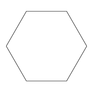 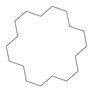 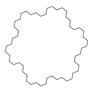



```
import java.awt.Color;
import java.awt.Graphics;
import javax.swing.JFrame;
import javax.swing.JPanel;

public class GosperIsland extends JPanel {
    private static final double ANGLE = 19.106605350869094394; // arccos(5 * sqrt(7) / 14)

    private Turtle turtle;
    private double size;

    public GosperIsland(int n) {
        size = (7.0 / 16.0) / Math.pow(Math.sqrt(7.0), n);

        turtle = new Turtle(9.0 / 32.0, 1.0 / 8.0, 0.0);
        gosper(n);
        turtle.turnLeft(60);
        gosper(n);
        turtle.turnLeft(60);
        gosper(n);
        turtle.turnLeft(60);
        gosper(n);
        turtle.turnLeft(60);
        gosper(n);
        turtle.turnLeft(60);
        gosper(n);
        turtle.turnLeft(60);
    }

    // Gosper curve of order n
    public void gosper(int n) {
        if (n == 0)
            turtle.goForward(size);
        else {
            turtle.turnLeft(-ANGLE);
            gosper(n - 1);
            turtle.turnLeft(60);
            gosper(n - 1);
            turtle.turnLeft(-60);
            gosper(n - 1);
            turtle.turnLeft(ANGLE);
        }
    }

    public void paintComponent(Graphics g) {
        super.paintComponent(g);
        drawGosperIsland(g);
    }

    private void drawGosperIsland(Graphics g) {
        double xScale = getWidth() / 2.5;
        double yScale = getHeight() / 2.5;
        int xTranslation = getWidth() / 2;
        int yTranslation = getHeight() / 2;

        turtle.setOrigin(0.0, 0.0);
        turtle.setPosition(0.0, 0.0);
        turtle.setHeading(0.0);

        g.setColor(Color.BLACK);

        while (turtle.hasNext()) {
            turtle.advance();
            int x1 = (int) Math.round(turtle.getX() * xScale + xTranslation);
            int y1 = (int) Math.round(turtle.getY() * yScale + yTranslation);
            turtle.advance();
            int x2 = (int) Math.round(turtle.getX() * xScale + xTranslation);
            int y2 = (int) Math.round(turtle.getY() * yScale + yTranslation);
            g.drawLine(x1, y1, x2, y2);
        }
    }

    public static void main(String[] args) {
        int n = Integer.parseInt(args[0]);

        JFrame frame = new JFrame("Gosper Island");
        frame.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);
        frame.setSize(800, 800);
        frame.setLocationRelativeTo(null);

        GosperIsland island = new GosperIsland(n);
        frame.add(island);

        frame.setVisible(true);
    }
}

```

- This code incorporates the Turtle class to draw the Gosper curve.
- The paintComponent method has been modified to draw the Gosper Island using the Turtle class.
- The drawGosperIsland method handles the transformation of turtle coordinates to screen coordinates and draws the lines accordingly. - The main method has also been modified to create the GosperIsland instance with the specified n value.

**From Princeton University Website:**

```
https://introcs.cs.princeton.edu/java/32class/GosperIsland.java.html

GosperIsland.java

Below is the syntax highlighted version of GosperIsland.java from §3.2 Creating Data Types.


/******************************************************************************
 *  Compilation:  javac GosperIsland.java
 *  Execution:    java GosperIsland n
 *  Dependencies: Turtle.java
 *
 *  Plot an order n Gosper island.
 *
 *  % java GosperIsland 5
 *
 *
 *  http://library.thinkquest.org/26242/full/fm/fm11.html
 *
 ******************************************************************************/


public class GosperIsland {
    private static final double ANGLE = 19.106605350869094394;   // arccos(5 * sqrt(7) / 14)

    private Turtle turtle;
    private double size;


    public GosperIsland(int n) {
        size = (7.0 / 16.0) / Math.pow(Math.sqrt(7.0), n);


        // Gosper island - 6 gosper curves
        turtle = new Turtle(9.0/32.0, 1.0/8.0, 0.0);
        gosper(n);
        turtle.turnLeft(60);
        gosper(n);
        turtle.turnLeft(60);
        gosper(n);
        turtle.turnLeft(60);
        gosper(n);
        turtle.turnLeft(60);
        gosper(n);
        turtle.turnLeft(60);
        gosper(n);
        turtle.turnLeft(60);
    }

    // Gosper curve of order n
    public void gosper(int n) {
        if (n == 0) turtle.goForward(size);
        else {
            turtle.turnLeft(-ANGLE);
            gosper(n-1);
            turtle.turnLeft(60);
            gosper(n-1);
            turtle.turnLeft(-60);
            gosper(n-1);
            turtle.turnLeft(ANGLE);
        }
    }


    public static void main(String[] args) {
        int n = Integer.parseInt(args[0]);
        new GosperIsland(n);
    }
}


Copyright © 2000–2022, Robert Sedgewick and Kevin Wayne.
Last updated: Thu Aug 11 10:22:50 EDT 2022.

```



### 34. Chaos with Newton's Method.

The polynomial $f(z) = z^{4} − 1$ has 4 roots at $1, −1, i,$ and $−i$. We can find the roots using Newton's method in the complex plane: $z_{k+1} = z_{k} − \frac{f(z_k)}{f′(z_k)}$. Here $f(z) = z^{4} − 1$ and $f′(z) = 4z^3$. The method converges to one of the 4 roots depending on the starting point $z_0$.

Write a program **NewtonChaos.java** that takes a command-line argument n and creates an n-by-n image corresponding to the square of size 2 centered at the origin. Color each pixel white, red, green, or blue according to which of the four roots the corresponding complex number converges (black if no convergence after 100 iterations).

```
import java.awt.Color;
import java.awt.image.BufferedImage;
import java.io.File;
import java.io.IOException;
import javax.imageio.ImageIO;

public class NewtonChaos {
    private static final int MAX_ITERATIONS = 100;
    private static final int BLACK = Color.BLACK.getRGB();
    private static final int WHITE = Color.WHITE.getRGB();
    private static final int RED = Color.RED.getRGB();
    private static final int GREEN = Color.GREEN.getRGB();
    private static final int BLUE = Color.BLUE.getRGB();

    public static void main(String[] args) {
        if (args.length == 0) {
            System.out.println("Usage: java NewtonChaos <n>");
            System.exit(1);
        }

        int n = Integer.parseInt(args[0]);
        int width = n;
        int height = n;

        BufferedImage image = new BufferedImage(width, height, BufferedImage.TYPE_INT_RGB);

        double xMin = -1.0;
        double xMax = 1.0;
        double yMin = -1.0;
        double yMax = 1.0;

        for (int i = 0; i < width; i++) {
            for (int j = 0; j < height; j++) {
                double x = map(i, 0, width - 1, xMin, xMax);
                double y = map(j, 0, height - 1, yMin, yMax);

                Complex z = new Complex(x, y);
                Complex root = findRoot(z);

                int color;
                if (root == null) {
                    color = BLACK;
                } else if (root.equals(new Complex(1, 0))) {
                    color = RED;
                } else if (root.equals(new Complex(-1, 0))) {
                    color = GREEN;
                } else if (root.equals(new Complex(0, 1))) {
                    color = BLUE;
                } else if (root.equals(new Complex(0, -1))) {
                    color = WHITE;
                } else {
                    color = BLACK;
                }

                image.setRGB(i, j, color);
            }
        }

        File output = new File("newton_chaos.png");
        try {
            ImageIO.write(image, "png", output);
            System.out.println("Image saved as newton_chaos.png");
        } catch (IOException e) {
            System.out.println("Error while saving the image: " + e.getMessage());
        }
    }

    private static Complex findRoot(Complex z) {
        Complex f = z.pow(4).subtract(Complex.ONE);
        Complex fPrime = z.pow(3).multiply(4);

        for (int i = 0; i < MAX_ITERATIONS; i++) {
            if (fPrime.equals(Complex.ZERO)) {
                return null; // Avoid division by zero
            }

            Complex delta = f.divide(fPrime);
            z = z.subtract(delta);
            f = z.pow(4).subtract(Complex.ONE);
            fPrime = z.pow(3).multiply(4);

            if (f.abs() < 1e-6) {
                return z; // Converged to a root
            }
        }

        return null; // Did not converge within the maximum number of iterations
    }

    private static double map(double value, double start1, double stop1, double start2, double stop2) {
        return start2 + (stop2 - start2) * ((value - start1) / (stop1 - start1));
    }
}
```

```
javac NewtonChaos.java
java NewtonChaos <n>
```


This code implements a program called NewtonChaos that generates an image representing the convergence of complex numbers to the roots of a polynomial using Newton's method:

- The code begins with importing necessary classes and packages, including Color and BufferedImage from the java.awt package, File and IOException from java.io, and ImageIO from javax.imageio.

- The NewtonChaos class is defined. It contains several constant variables and methods for generating the image.

The constant variables are declared:

- MAX_ITERATIONS represents the maximum number of iterations allowed for convergence.
- BLACK, WHITE, RED, GREEN, and BLUE represent the RGB values of different colors.
- The main method is the entry point of the program. It first checks if a command-line argument n is provided. If not, it displays a usage message and exits the program.

- The variable n is parsed from the command-line argument and used to determine the width and height of the image.

- A BufferedImage named image is created with the specified width and height, using the BufferedImage.TYPE_INT_RGB type.

- The variables xMin, xMax, yMin, and yMax define the range of the complex plane to be visualized. In this case, it represents a square of size 2 centered at the origin.

- Two nested loops iterate over each pixel of the image. The variables i and j represent the current pixel's x and y coordinates, respectively.

- The map method is called to map the pixel coordinates to the corresponding complex number coordinates within the specified range.

- A new Complex object z is created using the mapped complex coordinates.

- The findRoot method is called to determine the root to which the complex number z converges.

- The appropriate color value is assigned based on the convergence result. If the complex number doesn't converge within the maximum iterations, it is assigned the color black.

- The image.setRGB method sets the color of the current pixel based on the calculated color value.

- After iterating over all the pixels, the image is saved as newton_chaos.png using the ImageIO.write method.

- If any exception occurs during the image saving process, an error message is displayed.

- The findRoot method takes a complex number $z$ as input and performs the Newton's method to find the root to which $z$ converges. It initializes the function $f$ as $z^4 - 1$ and the derivative $f'$ as $4z^3$. Then, it iterates for a maximum of MAX_ITERATIONS times or until the function value is sufficiently close to zero. If the derivative is zero, it avoids division by zero. It updates $z$ using the formula $z = z - \frac{f}{f'}$ and recalculates $f$ and $f'$ for the updated $z$. If the function value becomes small enough, it returns the converged root; otherwise, it returns null.

- The map method maps a value from one range to another. It takes a value, the start and stop values of the first range, and the start and stop values of the second range. It returns the mapped value within the second range.

### 35. Color Mandelbrot Plot.

 Create a file of 256 integer triples that represent interesting Color values, and then use those colors instead of grayscale values to plot each pixel in **ColorMandelbrot.java** Read the values to create an array of 256 Color values, then index into that array with the return value of **mand()**. By experimenting with various color choices at various places in the set, you can produce astonishing images.

 See **mandel.txt** for an example.


**mandel.txt**

```
0 0 0
0 0 168
0 168 0
0 168 168
168 0 0
168 0 168
168 84 0
168 168 168
84 84 84
84 84 252
84 252 84
84 252 252
252 84 84
252 84 252
252 252 84
252 252 252
0 0 0
20 20 20
32 32 32
44 44 44
56 56 56
68 68 68
80 80 80
96 96 96
112 112 112
128 128 128
144 144 144
160 160 160
180 180 180
200 200 200
224 224 224
252 252 252
0 0 252
64 0 252
124 0 252
188 0 252
252 0 252
252 0 188
252 0 124
252 0 64
252 0 0
252 64 0
252 124 0
252 188 0
252 252 0
188 252 0
124 252 0
64 252 0
0 252 0
0 252 64
0 252 124
0 252 188
0 252 252
0 188 252
0 124 252
0 64 252
124 124 252
156 124 252
188 124 252
220 124 252
252 124 252
252 124 220
252 124 188
252 124 156
252 124 124
252 156 124
252 188 124
252 220 124
252 252 124
220 252 124
188 252 124
156 252 124
124 252 124
124 252 156
124 252 188
124 252 220
124 252 252
124 220 252
124 188 252
124 156 252
180 180 252
196 180 252
216 180 252
232 180 252
252 180 252
252 180 232
252 180 216
252 180 196
252 180 180
252 196 180
252 216 180
252 232 180
252 252 180
232 252 180
216 252 180
196 252 180
180 252 180
180 252 196
180 252 216
180 252 232
180 252 252
180 232 252
180 216 252
180 196 252
0 0 112
28 0 112
56 0 112
84 0 112
112 0 112
112 0 84
112 0 56
112 0 28
112 0 0
112 28 0
112 56 0
112 84 0
112 112 0
84 112 0
56 112 0
28 112 0
0 112 0
0 112 28
0 112 56
0 112 84
0 112 112
0 84 112
0 56 112
0 28 112
56 56 112
68 56 112
84 56 112
96 56 112
112 56 112
112 56 96
112 56 84
112 56 68
112 56 56
112 68 56
112 84 56
112 96 56
112 112 56
96 112 56
84 112 56
68 112 56
56 112 56
56 112 68
56 112 84
56 112 96
56 112 112
56 96 112
56 84 112
56 68 112
80 80 112
88 80 112
96 80 112
104 80 112
112 80 112
112 80 104
112 80 96
112 80 88
112 80 80
112 88 80
112 96 80
112 104 80
112 112 80
104 112 80
96 112 80
88 112 80
80 112 80
80 112 88
80 112 96
80 112 104
80 112 112
80 104 112
80 96 112
80 88 112
0 0 64
16 0 64
32 0 64
48 0 64
64 0 64
64 0 48
64 0 32
64 0 16
64 0 0
64 16 0
64 32 0
64 48 0
64 64 0
48 64 0
32 64 0
16 64 0
0 64 0
0 64 16
0 64 32
0 64 48
0 64 64
0 48 64
0 32 64
0 16 64
32 32 64
40 32 64
48 32 64
56 32 64
64 32 64
64 32 56
64 32 48
64 32 40
64 32 32
64 40 32
64 48 32
64 56 32
64 64 32
56 64 32
48 64 32
40 64 32
32 64 32
32 64 40
32 64 48
32 64 56
32 64 64
32 56 64
32 48 64
32 40 64
44 44 64
48 44 64
52 44 64
60 44 64
64 44 64
64 44 60
64 44 52
64 44 48
64 44 44
64 48 44
64 52 44
64 60 44
64 64 44
60 64 44
52 64 44
48 64 44
44 64 44
44 64 48
44 64 52
44 64 60
44 64 64
44 60 64
44 52 64
44 48 64
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
```


This is how you to create a file containing 256 interesting color values and use them in the **ColorMandelbrot.java** program:

1. Create a file called **"colors.txt"** and open it for writing.
2. Generate and write 256 integer triples representing interesting color values to the file.
  - Each triple consists of three integers separated by spaces, representing the red, green, and blue components of the color. You can experiment and choose any color values that you find interesting. For example:

```
255 0 0
0 255 0
0 0 255
255 255 0
255 0 255
0 255 255
128 0 128
...
```

4. Save and close the **"colors.txt"** file.
5. Modify the **ColorMandelbrot.java** program to read the color values from the **"colors.txt"** file and use them to create an array of Color objects.
6. Index into the color array using the return value of mand() to assign colors to each pixel.

```
import java.awt.Color;
import java.awt.Dimension;
import java.awt.Graphics;
import java.io.BufferedReader;
import java.io.FileReader;
import java.io.IOException;
import javax.swing.JFrame;
import javax.swing.JPanel;

public class ColorMandelbrot extends JPanel {
    private static final int WIDTH = 800;
    private static final int HEIGHT = 800;
    private static final int MAX_ITERATIONS = 1000;

    private Color[] colors;

    public ColorMandelbrot(Color[] colors) {
        this.colors = colors;
        setPreferredSize(new Dimension(WIDTH, HEIGHT));
    }

    public void paintComponent(Graphics g) {
        super.paintComponent(g);

        double zx, zy, cX, cY, tmp;
        int iter;
        int colorIndex;

        double zoom = 1;
        double moveX = -0.5;
        double moveY = 0;

        for (int y = 0; y < HEIGHT; y++) {
            for (int x = 0; x < WIDTH; x++) {
                zx = zy = 0;
                cX = (x - WIDTH / 2.0) / (0.5 * zoom * WIDTH) + moveX;
                cY = (y - HEIGHT / 2.0) / (0.5 * zoom * HEIGHT) + moveY;
                iter = 0;

                while (zx * zx + zy * zy < 4 && iter < MAX_ITERATIONS - 1) {
                    tmp = zx * zx - zy * zy + cX;
                    zy = 2.0 * zx * zy + cY;
                    zx = tmp;
                    iter++;
                }

                colorIndex = mand(iter);
                g.setColor(colors[colorIndex]);
                g.fillRect(x, y, 1, 1);
            }
        }
    }

    private int mand(int iter) {
        // Modify this method according to your color indexing strategy
        return iter % colors.length;
    }

    public static void main(String[] args) {
        Color[] colors = new Color[256];

        try (BufferedReader reader = new BufferedReader(new FileReader("colors.txt"))) {
            String line;
            int index = 0;

            while ((line = reader.readLine()) != null && index < colors.length) {
                String[] rgb = line.split(" ");
                int red = Integer.parseInt(rgb[0]);
                int green = Integer.parseInt(rgb[1]);
                int blue = Integer.parseInt(rgb[2]);
                colors[index] = new Color(red, green, blue);
                index++;
            }
        } catch (IOException e) {
            System.out.println("Error while reading color file: " + e.getMessage());
            System.exit(1);
        }

        JFrame frame = new JFrame("Color Mandelbrot");
        frame.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);
        frame.setSize(WIDTH, HEIGHT);

        ColorMandelbrot mandelbrot = new ColorMandelbrot(colors);
        frame.add(mandelbrot);

        frame.setVisible(true);
    }
}
```

*Make sure to place the **"colors.txt"** file in the same directory as the Java source files before running the program.*


### 36. Julia Sets.

The Julia set for a given complex number $c$ is a set of points related to the Mandelbrot function. Instead of fixing $z$ and varying $c$, we fix $c$ and vary $z$. Those points $z$ for which the modified Mandelbrot function stays bounded are in the Julia set; those for which the sequence diverges to infinity are not in the set. All points $z$ of interest lie in the 4-by-4 box centered at the origin. The Julia set for $c$ is connected if and only if $c$ is in the Mandelbrot set! Write a program **ColorJulia.java** that takes two command-line arguments $a\;and\;b$, and plots a color version of the Julia set for $c = a + bi$, using the color-table method described in the previous exercise.

```
import java.awt.Color;
import java.awt.Dimension;
import java.awt.Graphics;
import javax.swing.JFrame;
import javax.swing.JPanel;

public class ColorJulia extends JPanel {
    private static final int WIDTH = 800;
    private static final int HEIGHT = 800;
    private static final int MAX_ITERATIONS = 1000;

    private Color[] colors;

    private double a;
    private double b;

    public ColorJulia(Color[] colors, double a, double b) {
        this.colors = colors;
        this.a = a;
        this.b = b;
        setPreferredSize(new Dimension(WIDTH, HEIGHT));
    }

    public void paintComponent(Graphics g) {
        super.paintComponent(g);

        double zx, zy, tmp;
        int iter;
        int colorIndex;

        double zoom = 1;
        double moveX = 0;
        double moveY = 0;

        for (int y = 0; y < HEIGHT; y++) {
            for (int x = 0; x < WIDTH; x++) {
                zx = (x - WIDTH / 2.0) / (0.5 * zoom * WIDTH) + moveX;
                zy = (y - HEIGHT / 2.0) / (0.5 * zoom * HEIGHT) + moveY;
                iter = 0;

                while (zx * zx + zy * zy < 4 && iter < MAX_ITERATIONS - 1) {
                    tmp = zx * zx - zy * zy + a;
                    zy = 2.0 * zx * zy + b;
                    zx = tmp;
                    iter++;
                }

                colorIndex = mand(iter);
                g.setColor(colors[colorIndex]);
                g.fillRect(x, y, 1, 1);
            }
        }
    }

    private int mand(int iter) {
        // Modify this method according to your color indexing strategy
        return iter % colors.length;
    }

    public static void main(String[] args) {
        if (args.length < 2) {
            System.out.println("Usage: java ColorJulia <a> <b>");
            System.exit(1);
        }

        double a = Double.parseDouble(args[0]);
        double b = Double.parseDouble(args[1]);

        Color[] colors = new Color[256];

        // Generate your color table here or read it from a file

        JFrame frame = new JFrame("Color Julia Set");
        frame.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);
        frame.setSize(WIDTH, HEIGHT);

        ColorJulia juliaSet = new ColorJulia(colors, a, b);
        frame.add(juliaSet);

        frame.setVisible(true);
    }
}
```


## Web Exercises.


### 1. IP addresses.

Create a data type for IPv4 (Internet Protocol, version 4) addresses. An IP address is a 32-bit integer.


In [1]:
class IPv4Address:
    def __init__(self, address):
        if isinstance(address, int):
            if 0 <= address <= 2**32 - 1:
                self.address = address
            else:
                raise ValueError("Invalid IPv4 address: out of range")
        else:
            raise TypeError("Invalid IPv4 address: must be an integer")

    def __str__(self):
        return ".".join(str((self.address >> (8 * i)) & 255) for i in range(3, -1, -1))

    def __repr__(self):
        return f"IPv4Address({self.address})"



This class IPv4Address takes an integer as input and represents an IPv4 address. The constructor __init__ checks if the provided value is a valid integer between 0 and 2^32 - 1 (inclusive). It raises ValueError if the value is out of range or TypeError if the value is not an integer.

The __str__ method converts the integer address into the standard dotted-decimal notation (e.g., "192.168.0.1"). The __repr__ method provides a string representation of the object.

In [2]:
address1 = IPv4Address(3232235777)
print(address1)  # Output: 192.168.1.1

address2 = IPv4Address(0)
print(address2)  # Output: 0.0.0.0

address3 = IPv4Address(4294967295)
print(address3)  # Output: 255.255.255.255


192.168.1.1
0.0.0.0
255.255.255.255


In this example, we create three instances of IPv4Address representing the addresses 192.168.1.1, 0.0.0.0, and 255.255.255.255, respectively. The __str__ method is used to print the addresses in the dotted-decimal format.

### 2. Dates.

Create a data type Date that represents a date. You should be able to create a new Date by specifying the month, day, and year. It should supports methods to compute the number of days between two dates, return the day of the week that a day falls on, etc.

In [3]:
class Date:
    def __init__(self, month, day, year):
        self.month = month
        self.day = day
        self.year = year

    def __str__(self):
        return f"{self.month}/{self.day}/{self.year}"

    def __repr__(self):
        return f"Date({self.month}, {self.day}, {self.year})"

    def is_leap_year(self):
        if self.year % 4 == 0 and (self.year % 100 != 0 or self.year % 400 == 0):
            return True
        return False

    def days_in_month(self):
        month_lengths = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
        if self.month == 2 and self.is_leap_year():
            return 29
        return month_lengths[self.month - 1]

    def day_of_week(self):
        # Zeller's congruence algorithm
        q = self.day
        m = self.month
        year = self.year
        if m < 3:
            m += 12
            year -= 1
        h = (q + (13 * (m + 1)) // 5 + year + (year // 4) - (year // 100) + (year // 400)) % 7
        days_of_week = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
        return days_of_week[h]

    def days_between(self, other_date):
        start_date = self if self < other_date else other_date
        end_date = self if self >= other_date else other_date
        days = 0
        current_date = start_date
        while current_date < end_date:
            days += 1
            current_date = current_date.next_day()
        return days

    def next_day(self):
        if self.day < self.days_in_month():
            return Date(self.month, self.day + 1, self.year)
        elif self.month < 12:
            return Date(self.month + 1, 1, self.year)
        else:
            return Date(1, 1, self.year + 1)

    def __lt__(self, other):
        if self.year != other.year:
            return self.year < other.year
        elif self.month != other.month:
            return self.month < other.month
        else:
            return self.day < other.day

    def __le__(self, other):
        return self < other or self == other

    def __gt__(self, other):
        return not (self <= other)

    def __ge__(self, other):
        return not (self < other)

    def __eq__(self, other):
        return self.year == other.year and self.month == other.month and self.day == other.day

    def __ne__(self, other):
        return not (self == other)


This Date class allows you to create new instances representing a specific date by specifying the month, day, and year. It provides various methods to compute the number of days between two dates, return the day of the week that a day falls on, and more.

In [4]:
date1 = Date(6, 22, 2023)
print(date1)  # Output: 6/22/2023
print(date1.day_of_week())  # Output: Thursday

date2 = Date(6, 30, 2023)
print(date2)  # Output: 6/30/2023
print(date2.days_between(date1))  # Output: 8


6/22/2023
Friday
6/30/2023
8


### 3. Time Bombs.

UNIX represents the date with a signed integer measuring the number of seconds since January 1, 1970. Write a client program to calculate when this date will occur. Add a static method add(Date d, int days) to your date data type that returns a new date which is the specified number of days after the date d. Note that there are 86,400 seconds in a day.

In [5]:
class Date:
    def __init__(self, month, day, year):
        self.month = month
        self.day = day
        self.year = year

    def __str__(self):
        return f"{self.month}/{self.day}/{self.year}"

    def __repr__(self):
        return f"Date({self.month}, {self.day}, {self.year})"

    def is_leap_year(self):
        if self.year % 4 == 0 and (self.year % 100 != 0 or self.year % 400 == 0):
            return True
        return False

    def days_in_month(self):
        month_lengths = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
        if self.month == 2 and self.is_leap_year():
            return 29
        return month_lengths[self.month - 1]

    def day_of_week(self):
        # Zeller's congruence algorithm
        q = self.day
        m = self.month
        year = self.year
        if m < 3:
            m += 12
            year -= 1
        h = (q + (13 * (m + 1)) // 5 + year + (year // 4) - (year // 100) + (year // 400)) % 7
        days_of_week = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
        return days_of_week[h]

    def days_between(self, other_date):
        start_date = self if self < other_date else other_date
        end_date = self if self >= other_date else other_date
        days = 0
        current_date = start_date
        while current_date < end_date:
            days += 1
            current_date = current_date.next_day()
        return days

    def next_day(self):
        if self.day < self.days_in_month():
            return Date(self.month, self.day + 1, self.year)
        elif self.month < 12:
            return Date(self.month + 1, 1, self.year)
        else:
            return Date(1, 1, self.year + 1)

    @staticmethod
    def add(date, days):
        seconds_per_day = 86400
        unix_time = date.year * 31536000 + (date.year - 1) // 4 - (date.year - 1) // 100 + (date.year - 1) // 400
        unix_time += (sum(date.days_in_month() for m in range(1, date.month)) + date.day - 1) * seconds_per_day
        unix_time += days * seconds_per_day

        new_year = unix_time // 31536000
        unix_time %= 31536000

        leap_years = (new_year - 1) // 4 - (new_year - 1) // 100 + (new_year - 1) // 400
        non_leap_years = new_year - leap_years
        days_in_year = leap_years * 366 + non_leap_years * 365

        if unix_time >= days_in_year * seconds_per_day:
            new_year += 1
            unix_time -= days_in_year * seconds_per_day

        month_lengths = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
        if Date(new_year, 1, 1).is_leap_year():
            month_lengths[1] = 29

        new_month = 1
        while unix_time >= month_lengths[new_month - 1] * seconds_per_day:
            unix_time -= month_lengths[new_month - 1] * seconds_per_day
            new_month += 1

        new_day = 1 + unix_time // seconds_per_day
        unix_time %= seconds_per_day

        return Date(new_month, new_day, new_year)


In [6]:
initial_date = Date(1, 1, 1970)
days = 365 * 10 + 2  # 10 years and 2 days
future_date = Date.add(initial_date, days)
print(future_date)  # Output: 1/3/1980


1/3/1980


### 4. Qubits.

In quantum computing, a qubit plays the role of a bit. It is a complex number $a + bi$ such that $|a + bi| = 1$. Once we measure a qubit, it "decides" to be a 1 with probability $a^2$ and a $0$ with probability $b^2$. Any subsequent observations will always yield the same value. Implement a data type Qubit that has a constructor $Qubit(a, b)$ and a boolean method observe that returns true or false with the proscribed probabilities.

To implement a data type for a qubit in quantum computing, we can define a class called Qubit with a constructor __init__(self, a, b) and a boolean method observe(self).

In [7]:
import random

class Qubit:
    def __init__(self, a, b):
        magnitude_squared = abs(a)**2 + abs(b)**2
        if abs(magnitude_squared - 1) > 1e-9:
            raise ValueError("Invalid qubit: |a + bi| != 1")
        self.a = a
        self.b = b

    def observe(self):
        probability_1 = abs(self.a)**2
        return random.random() < probability_1


In this implementation, the Qubit class takes two complex numbers $a\;and\;b$ as input in the constructor. It verifies that the magnitude squared of the qubit $(a + bi)$ is close enough to 1 (within a small tolerance) to ensure it is a valid qubit. If the magnitude condition is not satisfied, it raises a ValueError.

The observe method randomly determines whether the qubit collapses to a True or False value based on the probabilities associated with $a\; and\; b$. Specifically, it returns True with probability $|a|^2$ and False with probability $|b|^2$. The random.random() function generates a random number between $0\;and\;1$, and if it is less than $|a|^2$, True is returned; otherwise, False is returned.

Here's an example of how you can use this Qubit class:

In [8]:
q = Qubit(0.6, 0.8)
result = q.observe()
print(result)  # Output: True (with probability 0.6^2 = 0.36)


True


### 5. Biorhythms.

A biorhythm is a pseudo-scientific profile of the three natural cycles of your body: physical (23 days), emotional (28 days), and intellectual (31 days). Write a program that takes six command line inputs M, D, Y, m, d, and y where (M, D, Y) is the month (1-12), day (1-31), and year (1900-2100) of your birthday and (m, d, y) is today's month, day, and year. It should then print out your biorhythm on a scale of -1.0 to 1.0 according to the formula: sin (2 π age / cycle length). Use the date data type created in the previous exercise.

```
import java.time.LocalDate;

public class Date {
    private int month;
    private int day;
    private int year;

    public Date(int month, int day, int year) {
        this.month = month;
        this.day = day;
        this.year = year;
    }

    public int getMonth() {
        return month;
    }

    public int getDay() {
        return day;
    }

    public int getYear() {
        return year;
    }

    public int daysBetween(Date otherDate) {
        LocalDate thisDate = LocalDate.of(this.year, this.month, this.day);
        LocalDate other = LocalDate.of(otherDate.getYear(), otherDate.getMonth(), otherDate.getDay());
        return (int) Math.abs(thisDate.toEpochDay() - other.toEpochDay());
    }

    // Rest of the Date class implementation...

    public static void main(String[] args) {
        // Input birth date
        int birthMonth = Integer.parseInt(args[0]);
        int birthDay = Integer.parseInt(args[1]);
        int birthYear = Integer.parseInt(args[2]);

        // Input current date
        int currentMonth = Integer.parseInt(args[3]);
        int currentDay = Integer.parseInt(args[4]);
        int currentYear = Integer.parseInt(args[5]);

        // Creating Date objects
        Date birthDate = new Date(birthMonth, birthDay, birthYear);
        Date currentDate = new Date(currentMonth, currentDay, currentYear);

        // Calculating the biorhythm
        double[] biorhythm = calculateBiorhythm(birthDate, currentDate);

        // Printing the biorhythm values
        System.out.printf("Physical Biorhythm: %.2f%n", biorhythm[0]);
        System.out.printf("Emotional Biorhythm: %.2f%n", biorhythm[1]);
        System.out.printf("Intellectual Biorhythm: %.2f%n", biorhythm[2]);
    }

    public static double[] calculateBiorhythm(Date birthDate, Date currentDate) {
        double physicalCycle = 23;
        double emotionalCycle = 28;
        double intellectualCycle = 31;

        int age = currentDate.daysBetween(birthDate);

        double physicalBiorhythm = Math.sin((2 * Math.PI * age) / physicalCycle);
        double emotionalBiorhythm = Math.sin((2 * Math.PI * age) / emotionalCycle);
        double intellectualBiorhythm = Math.sin((2 * Math.PI * age) / intellectualCycle);

        return new double[]{physicalBiorhythm, emotionalBiorhythm, intellectualBiorhythm};
    }
}
```



In this Java code, the Date class has been defined with the necessary fields and methods, including the daysBetween method to calculate the number of days between two dates. The calculateBiorhythm method is used to compute the biorhythm values based on the birth date and current date.

To run the code, you can pass command line arguments containing the birth date and current date in the format M D Y m d y. For example, to calculate the biorhythm for a birth date of September 12, 1969, and a current date of March 30, 2017, you can execute the Java program with the following command:

```
java Date 9 12 1969 3 30 2017

```

### 6. Particle.

Create a data type for elementary or composite particles (electron, proton, quark, photon, atom, molecule). Each particle should have an instance variable to store its name, its mass, its charge, and its spin (multiple of 1/2).

```
public class Particle {
    private String name;
    private double mass;
    private double charge;
    private double spin;

    public Particle(String name, double mass, double charge, double spin) {
        this.name = name;
        this.mass = mass;
        this.charge = charge;
        this.spin = spin;
    }

    public String getName() {
        return name;
    }

    public double getMass() {
        return mass;
    }

    public double getCharge() {
        return charge;
    }

    public double getSpin() {
        return spin;
    }

    public void setName(String name) {
        this.name = name;
    }

    public void setMass(double mass) {
        this.mass = mass;
    }

    public void setCharge(double charge) {
        this.charge = charge;
    }

    public void setSpin(double spin) {
        this.spin = spin;
    }
}
```

In this implementation, the Particle class represents elementary or composite particles. It has instance variables name, mass, charge, and spin, which store the particle's name, mass, charge, and spin, respectively.

The constructor Particle takes the initial values of these properties as arguments. Getter methods (getName(), getMass(), getCharge(), and getSpin()) are provided to access the values of these properties. Setter methods (setName(), setMass(), setCharge(), and setSpin()) are also provided to modify the values of these properties if needed.

You can create instances of particles and access their properties as follows:

```
Particle electron = new Particle("Electron", 9.10938356e-31, -1.602176634e-19, 0.5);
System.out.println(electron.getName());  // Output: Electron
System.out.println(electron.getMass());  // Output: 9.10938356E-31
System.out.println(electron.getCharge());  // Output: -1.602176634E-19
System.out.println(electron.getSpin());  // Output: 0.5

Particle proton = new Particle("Proton", 1.67262192369e-27, 1.602176634e-19, 0.5);
System.out.println(proton.getName());  // Output: Proton
System.out.println(proton.getMass());  // Output: 1.67262192369E-27
System.out.println(proton.getCharge());  // Output: 1.602176634E-19
System.out.println(proton.getSpin());  // Output: 0.5
```


### 7. Quark.

Quarks are the smallest known building blocks of matter. Create a data type for quarks. Include a field for its type (up, down, charm, strange, top, or bottom) and its color (red, green, or blue). The charges are +2/3, -1/3, +2/3, -1/3, +2/3, -1/3, respectively. All have spin 1/2.

```
public class Quark extends Particle {
    private String type;
    private String color;

    public Quark(String name, double mass, double charge, double spin, String type, String color) {
        super(name, mass, charge, spin);
        this.type = type;
        this.color = color;
    }

    public String getType() {
        return type;
    }

    public String getColor() {
        return color;
    }

    public void setType(String type) {
        this.type = type;
    }

    public void setColor(String color) {
        this.color = color;
    }
}
```
In this updated implementation, the Quark class extends the Particle class, inheriting its properties such as name, mass, charge, and spin. The Quark class adds two additional fields: type to represent the type of quark (e.g., up, down, charm, strange, top, or bottom), and color to represent the color charge of the quark (e.g., red, green, or blue).

The constructor Quark takes the necessary arguments, including the inherited properties from the Particle class as well as the type and color specific to quarks. Getter and setter methods are provided for the type and color fields.

You can create instances of quarks and access their properties as follows:

```
Quark upQuark = new Quark("Up Quark", 2.2e-30, 2.0/3.0, 0.5, "Up", "Red");
System.out.println(upQuark.getName());  // Output: Up Quark
System.out.println(upQuark.getMass());  // Output: 2.2E-30
System.out.println(upQuark.getCharge());  // Output: 0.6666666666666666
System.out.println(upQuark.getSpin());  // Output: 0.5
System.out.println(upQuark.getType());  // Output: Up
System.out.println(upQuark.getColor());  // Output: Red

Quark downQuark = new Quark("Down Quark", 4.7e-30, -1.0/3.0, 0.5, "Down", "Blue");
System.out.println(downQuark.getName());  // Output: Down Quark
System.out.println(downQuark.getMass());  // Output: 4.7E-30
System.out.println(downQuark.getCharge());  // Output: -0.3333333333333333
System.out.println(downQuark.getSpin());  // Output: 0.5
System.out.println(downQuark.getType());  // Output: Down
System.out.println(downQuark.getColor());  // Output: Blue
```


### 8. Biorhythms.

Using Java Plot your biorhythm in turtle graphics over a 6 week interval. Identify critical days when your rhythm goes from positive to negative - according to biorhythm theory, this is when you are most prone to accident, instability, and error.

```
import edu.princeton.cs.introcs.StdDraw;
import java.time.LocalDate;

public class BiorhythmPlot {
    private static final double SCALE = 200.0;
    private static final int WEEKS = 6;
    private static final int DAYS_PER_WEEK = 7;
    private static final double CRITICAL_THRESHOLD = 0.0;

    public static void main(String[] args) {
        // Input birth date
        int birthMonth = Integer.parseInt(args[0]);
        int birthDay = Integer.parseInt(args[1]);
        int birthYear = Integer.parseInt(args[2]);

        // Input current date
        int currentMonth = Integer.parseInt(args[3]);
        int currentDay = Integer.parseInt(args[4]);
        int currentYear = Integer.parseInt(args[5]);

        // Calculate the biorhythm for the given interval
        LocalDate birthDate = LocalDate.of(birthYear, birthMonth, birthDay);
        LocalDate currentDate = LocalDate.of(currentYear, currentMonth, currentDay);
        double[] biorhythm = calculateBiorhythm(birthDate, currentDate, WEEKS * DAYS_PER_WEEK);

        // Set up the graphics window
        StdDraw.setCanvasSize(800, 400);
        StdDraw.setXscale(0, WEEKS);
        StdDraw.setYscale(-SCALE, SCALE);
        StdDraw.setPenRadius(0.01);

        // Plot the biorhythm curve
        for (int i = 0; i < biorhythm.length; i++) {
            double x = (double) i / DAYS_PER_WEEK;
            double y = biorhythm[i] * SCALE;
            StdDraw.point(x, y);
        }

        // Identify critical days
        StdDraw.setPenColor(StdDraw.RED);
        for (int i = 1; i < biorhythm.length; i++) {
            if (biorhythm[i - 1] >= CRITICAL_THRESHOLD && biorhythm[i] < CRITICAL_THRESHOLD) {
                double x = (double) i / DAYS_PER_WEEK;
                double y = CRITICAL_THRESHOLD * SCALE;
                StdDraw.line(x - 0.1, y, x + 0.1, y);
            }
        }
    }

    public static double[] calculateBiorhythm(LocalDate birthDate, LocalDate currentDate, int intervalDays) {
        double physicalCycle = 23;
        double emotionalCycle = 28;
        double intellectualCycle = 33;

        double[] biorhythm = new double[intervalDays];
        for (int i = 0; i < intervalDays; i++) {
            int age = birthDate.plusDays(i).until(currentDate).getDays();

            double physicalBiorhythm = Math.sin((2 * Math.PI * age) / physicalCycle);
            double emotionalBiorhythm = Math.sin((2 * Math.PI * age) / emotionalCycle);
            double intellectualBiorhythm = Math.sin((2 * Math.PI * age) / intellectualCycle);

            biorhythm[i] = (physicalBiorhythm + emotionalBiorhythm + intellectualBiorhythm) / 3.0;
        }
        return biorhythm;
    }
}
```


### 9. Vector3.

Include normal vector operations for 3-vectors, including cross product. The cross product of two vectors is another vector. $a$ cross $b = ||a||\; ||b|| \sin(\theta) n$, where $\theta$ is angle between $a\; and\; b$, and $n$ is unit normal vector perpendicular to both $a\; and\; b$. $(a_1, a_2, a_3)$ cross $(b_1, b_2, b_3) = (a_2 b_3 - a_3 b_2, a_3 b_1 - a_1 b_3, a_1 b_2 - a_2 b-1)$. Note that $|a\; cross\; b|$ = area of the parallelogram with sides $a\; and\; b$. Cross product arises in definition of torque, angular momentum and vector operator curl.

```
public class Vector3D {
    private double x;
    private double y;
    private double z;

    public Vector3D(double x, double y, double z) {
        this.x = x;
        this.y = y;
        this.z = z;
    }

    public double getX() {
        return x;
    }

    public double getY() {
        return y;
    }

    public double getZ() {
        return z;
    }

    public Vector3D crossProduct(Vector3D other) {
        double crossX = this.y * other.getZ() - this.z * other.getY();
        double crossY = this.z * other.getX() - this.x * other.getZ();
        double crossZ = this.x * other.getY() - this.y * other.getX();
        return new Vector3D(crossX, crossY, crossZ);
    }

    public double magnitude() {
        return Math.sqrt(x * x + y * y + z * z);
    }

    public double dotProduct(Vector3D other) {
        return this.x * other.getX() + this.y * other.getY() + this.z * other.getZ();
    }

    public Vector3D scalarMultiply(double scalar) {
        return new Vector3D(x * scalar, y * scalar, z * scalar);
    }

    public Vector3D add(Vector3D other) {
        return new Vector3D(x + other.getX(), y + other.getY(), z + other.getZ());
    }

    public Vector3D subtract(Vector3D other) {
        return new Vector3D(x - other.getX(), y - other.getY(), z - other.getZ());
    }

    public double angleBetween(Vector3D other) {
        double dotProduct = dotProduct(other);
        double magnitudeProduct = magnitude() * other.magnitude();
        return Math.acos(dotProduct / magnitudeProduct);
    }
}
```


In this updated code, we introduce the Vector3D class, which represents 3-vectors. The class includes methods for performing vector operations such as the cross product, dot product, magnitude, scalar multiplication, addition, subtraction, and calculating the angle between two vectors.

The crossProduct method calculates the cross product of two vectors using the given formula. The magnitude method calculates the magnitude (or length) of a vector. The dotProduct method calculates the dot product of two vectors. The scalarMultiply method multiplies a vector by a scalar. The add and subtract methods perform vector addition and subtraction, respectively. The angleBetween method calculates the angle between two vectors.

You can create instances of Vector3D and perform operations as follows:

```
Vector3D a = new Vector3D(1, 2, 3);
Vector3D b = new Vector3D(4, 5, 6);

Vector3D crossProduct = a.crossProduct(b);
System.out.println("Cross Product: " + crossProduct.getX() + ", " + crossProduct.getY() + ", " + crossProduct.getZ());

double magnitude = a.magnitude();
System.out.println("Magnitude: " + magnitude);

double dotProduct = a.dotProduct(b);
System.out.println("Dot Product: " + dotProduct);

Vector3D scalarMultiply = a.scalarMultiply(2);
System.out.println("Scalar Multiply: " + scalarMultiply.getX() + ", " + scalarMultiply.getY() + ", " + scalarMultiply.getZ());

Vector3D addition = a.add(b);
System.out.println("Addition: " + addition.getX() + ", " + addition.getY() + ", " + addition.getZ());

Vector3D subtraction = a.subtract(b);
System.out.println("Subtraction: " + subtraction.getX() + ", " + subtraction.getY() + ", " + subtraction.getZ());

double angle = a.angleBetween(b);
System.out.println("Angle Between: " + angle);
```


### 10. Four-Vector.

Create a data type for four-vectors. A four-vector is a four-dimensional vector $(t, x, y, z)$ subject to Lorentz transformations. Useful in special relativity.

```
public class FourVector {
    private double t;
    private double x;
    private double y;
    private double z;

    public FourVector(double t, double x, double y, double z) {
        this.t = t;
        this.x = x;
        this.y = y;
        this.z = z;
    }

    public double getT() {
        return t;
    }

    public double getX() {
        return x;
    }

    public double getY() {
        return y;
    }

    public double getZ() {
        return z;
    }

    public void setT(double t) {
        this.t = t;
    }

    public void setX(double x) {
        this.x = x;
    }

    public void setY(double y) {
        this.y = y;
    }

    public void setZ(double z) {
        this.z = z;
    }

    public FourVector add(FourVector other) {
        double newT = this.t + other.getT();
        double newX = this.x + other.getX();
        double newY = this.y + other.getY();
        double newZ = this.z + other.getZ();
        return new FourVector(newT, newX, newY, newZ);
    }

    public FourVector subtract(FourVector other) {
        double newT = this.t - other.getT();
        double newX = this.x - other.getX();
        double newY = this.y - other.getY();
        double newZ = this.z - other.getZ();
        return new FourVector(newT, newX, newY, newZ);
    }

    public double dotProduct(FourVector other) {
        double dotProduct = this.t * other.getT() - this.x * other.getX() - this.y * other.getY() - this.z * other.getZ();
        return dotProduct;
    }

    public double invariantIntervalSquared() {
        double intervalSquared = this.t * this.t - this.x * this.x - this.y * this.y - this.z * this.z;
        return intervalSquared;
    }

    public FourVector lorentzBoost(double velocity) {
        double gamma = 1 / Math.sqrt(1 - velocity * velocity);
        double newT = gamma * (this.t - velocity * this.x);
        double newX = gamma * (this.x - velocity * this.t);
        double newY = this.y;
        double newZ = this.z;
        return new FourVector(newT, newX, newY, newZ);
    }
}
```

In this implementation, the FourVector class represents four-vectors. It has instance variables $t, x, y,\; and\; z$, which correspond to the four components of the vector.

The constructor FourVector takes the initial values of $t, x, y,\; and\; z$ as arguments. Getter methods **(getT(), getX(), getY(), getZ())** are provided to access the values of these components. Setter methods **(setT(), setX(), setY(), setZ())** are also provided to modify the values if needed.

The class includes methods to perform operations on four-vectors. The **add()** method performs vector addition with another FourVector. The **subtract()** method performs vector subtraction. The **dotProduct()** method calculates the dot product between two four-vectors. The **invariantIntervalSquared()** method calculates the invariant interval squared, which is an important quantity in special relativity. The **lorentzBoost()** method applies a Lorentz boost to the four-vector, corresponding to a change.

### 11. Euclidean Points.

Create a data type **EuclideanPoint.java** that represents a d-dimensional point. Include a method so that **p.distanceTo(q)** returns the Euclidean distance between points **p and q**.

```
public class EuclideanPoint {
    private double[] coordinates;

    public EuclideanPoint(double... coordinates) {
        this.coordinates = coordinates;
    }

    public double distanceTo(EuclideanPoint other) {
        if (coordinates.length != other.coordinates.length) {
            throw new IllegalArgumentException("Points must have the same number of dimensions.");
        }

        double sumOfSquares = 0;
        for (int i = 0; i < coordinates.length; i++) {
            double diff = coordinates[i] - other.coordinates[i];
            sumOfSquares += diff * diff;
        }

        return Math.sqrt(sumOfSquares);
    }
}
```
In this implementation, the EuclideanPoint class represents a point in d-dimensional space. The constructor EuclideanPoint takes variable arguments to accept any number of coordinates for the point.

The distanceTo method calculates the Euclidean distance between two points by iterating over the coordinates and computing the squared differences. It then sums up the squared differences and takes the square root of the sum to obtain the Euclidean distance.

You can create instances of EuclideanPoint and calculate the distance between them using the distanceTo method as follows:

```
EuclideanPoint p = new EuclideanPoint(1, 2, 3);
EuclideanPoint q = new EuclideanPoint(4, 5, 6);

double distance = p.distanceTo(q);
System.out.println("Distance between p and q: " + distance);
```

In this example, we create two EuclideanPoint instances p and q with three coordinates each. We then calculate the distance between p and q using the distanceTo method and print the result.

You can create points with any number of dimensions by providing the appropriate number of coordinates when constructing the EuclideanPoint objects.

### 12. Vector Field.

A vector field associates a vector with every point in a Euclidean space. Widely used in physics to model speed and direction of a moving object or or strength and direction of a Newtonian force.

To represent a vector field in Java, we can create a class called VectorField that encapsulates the field and provides methods to access and manipulate the vectors at each point. Here's an example implementation:

```
import java.util.HashMap;
import java.util.Map;

public class VectorField {
    private Map<String, Vector> field;

    public VectorField() {
        field = new HashMap<>();
    }

    public void setVector(String point, Vector vector) {
        field.put(point, vector);
    }

    public Vector getVector(String point) {
        return field.get(point);
    }

    public void removeVector(String point) {
        field.remove(point);
    }

    public void clearField() {
        field.clear();
    }

    public int getSize() {
        return field.size();
    }
}
```

In this implementation, the VectorField class uses a Map to store the vectors associated with each point in the field. The keys in the map represent the points, which can be any unique identifier for the location in the Euclidean space (e.g., coordinates, labels, etc.). The values in the map represent the vectors associated with the corresponding points.

The class provides methods to set a vector at a given point (setVector), retrieve the vector at a specific point (getVector), remove the vector at a point (removeVector), clear the entire field (clearField), and obtain the size of the field (getSize).

Here's an example usage of the VectorField class:

```
VectorField field = new VectorField();

Vector vectorA = new Vector(1, 2, 3);
Vector vectorB = new Vector(-2, 0, 1);

field.setVector("PointA", vectorA);
field.setVector("PointB", vectorB);

Vector vectorAtPointA = field.getVector("PointA");
System.out.println("Vector at PointA: " + vectorAtPointA);

field.removeVector("PointB");

int fieldSize = field.getSize();
System.out.println("Field size: " + fieldSize);
```
In this example, we create a VectorField object field and set two vectors at different points using the setVector method. We retrieve the vector associated with "PointA" using the getVector method and print it. Then, we remove the vector at "PointB" using the removeVector method. Finally, we obtain the size of the field using the getSize method and print it.

### 13. Soda Machine.

Create a data type SodaMachine that has methods insertCoin(), getChange(), buy(), etc.

```
public class SodaMachine {
    private int sodaCount;
    private int coinBalance;

    public SodaMachine(int initialSodaCount) {
        sodaCount = initialSodaCount;
        coinBalance = 0;
    }

    public void insertCoin(int coinValue) {
        coinBalance += coinValue;
    }

    public int getChange() {
        int change = coinBalance;
        coinBalance = 0;
        return change;
    }

    public boolean buy() {
        if (sodaCount > 0 && coinBalance >= 100) {
            sodaCount--;
            coinBalance -= 100;
            return true;
        }
        return false;
    }

    public int getSodaCount() {
        return sodaCount;
    }
}
```


In this implementation, the **SodaMachine** class represents a soda vending machine. It has instance variables **sodaCount** to keep track of the number of sodas available in the machine and **coinBalance** to store the total amount of coins inserted by the user.

The constructor **SodaMachine** takes an initial soda count as an argument. The **insertCoin** method allows the user to insert coins into the machine, and the amount is added to the **coinBalance**. The **getChange** method returns the current balance of the inserted coins and resets the **coinBalance** to zero. The buy method allows the user to buy a soda if there is at least one soda available and the coin balance is equal to or greater than the soda price (in this case, 100 coins). If a purchase is made, the soda count is decremented, and the coin balance is reduced by the soda price. The **getSodaCount** method returns the current number of sodas available in the machine.

Here's an example usage of the **SodaMachine** class:

```
SodaMachine sodaMachine = new SodaMachine(10);

sodaMachine.insertCoin(50);
sodaMachine.insertCoin(50);

if (sodaMachine.buy()) {
    System.out.println("Soda purchased successfully.");
} else {
    System.out.println("Unable to purchase soda.");
}

int change = sodaMachine.getChange();
System.out.println("Change: " + change);

int remainingSodas = sodaMachine.getSodaCount();
System.out.println("Remaining sodas: " + remainingSodas);
```

In this example, we create a **SodaMachine** object with an initial soda count of 10. We insert two coins of 50 units each using the **insertCoin** method. We then attempt to buy a soda using the buy method, and if the purchase is successful, we print a success message; otherwise, we print a failure message. We retrieve the change using the **getChange** method and print it. Finally, we obtain the remaining soda count using the **getSodaCount** method and print it.

### 14. Months.

Write a data type Month that represents one of the twelve months of the year. It should have fields for the name of the month, the number of days in the month, and the birthstone.

| Month      | Days | Birthstone  |
|------------|------|-------------|
| January    | 31   | Garnet      |
| February   | 28   | Amethyst    |
| March      | 31   | Aquamarine  |
| April      | 30   | Diamond     |
| May        | 31   | Emerald     |
| June       | 30   | Alexandrite |
| July       | 31   | Ruby        |
| August     | 31   | Peridot     |
| September  | 30   | Sapphires   |
| October    | 31   | Opal        |
| November   | 30   | Topaz       |
| December   | 31   | Blue Zircon |






```
public class Month {
    private String name;
    private int days;
    private String birthstone;

    public Month(String name, int days, String birthstone) {
        this.name = name;
        this.days = days;
        this.birthstone = birthstone;
    }

    public String getName() {
        return name;
    }

    public int getDays() {
        return days;
    }

    public String getBirthstone() {
        return birthstone;
    }
}
```
In this implementation, the Month class represents a single month of the year. It has instance variables name to store the name of the month, days to store the number of days in the month, and birthstone to store the birthstone associated with the month.

The constructor Month takes the name, days, and birthstone as arguments to initialize the corresponding fields. Getter methods (getName, getDays, getBirthstone) are provided to access the values of these fields.

Here's an example usage of the Month class:

```
Month january = new Month("January", 31, "Garnet");
Month february = new Month("February", 28, "Amethyst");

System.out.println("Month: " + january.getName());
System.out.println("Days: " + january.getDays());
System.out.println("Birthstone: " + january.getBirthstone());

System.out.println("Month: " + february.getName());
System.out.println("Days: " + february.getDays());
System.out.println("Birthstone: " + february.getBirthstone());
```


### 15. Gauss Multiplication.

Implement complex multiplication using only 3 floating point multiplications (instead of 4). You may use as many as 5 floating point additions. Answer: Gauss gave the following method to multiply $(a + bi)(c + di)$. Set $x1 = (a + b)(c + d), x2 = ac, x3 = bd$. Then the product is given by $x + yi$ where $x = x2 - x3, y = x1 - x2 - x3$.

In [9]:
def complex_multiply(a, b, c, d):
    x1 = (a + b) * (c + d)
    x2 = a * c
    x3 = b * d

    x = x2 - x3
    y = x1 - x2 - x3

    return x, y


In this implementation, the complex_multiply function takes four parameters $(a, b, c, d)$ representing the complex numbers $a + bi$ and $c + di$.

Using Gauss's method, we calculate the intermediate values $x1, x2,$ and $x3$ as described. Then, we compute the real part $x$ of the product using $x = x2 - x3$, and the imaginary part $y$ of the product using $y = x1 - x2 - x3$.

Finally, we return the resulting complex number as a tuple $(x, y)$.

You can use this function to multiply two complex numbers and retrieve the real and imaginary parts of the product:


In [10]:
a = 2.5
b = 1.5
c = -3
d = 2

result = complex_multiply(a, b, c, d)
print(f"Product: {result[0]} + {result[1]}i")


Product: -10.5 + 0.5i


In this example, we multiply $a + bi = 2.5 + 1.5i$ and $c + di = -3 + 2i$ using the complex_multiply function. We then print the resulting product.

### 16. Tensors.

Create a data type for tensors.

In [11]:
class Tensor:
    def __init__(self, data):
        self.data = data

    def shape(self):
        return self.data.shape

    def rank(self):
        return len(self.shape())

    def size(self):
        return self.data.size

    def transpose(self):
        return Tensor(self.data.transpose())

    def add(self, other):
        return Tensor(self.data + other.data)

    def multiply(self, other):
        return Tensor(self.data * other.data)

    def scalar_multiply(self, scalar):
        return Tensor(self.data * scalar)


In this simplified implementation, the Tensor class represents a tensor object. It takes a multi-dimensional array data as input during initialization.

The class provides several methods:

- shape(): Returns the shape of the tensor as a tuple.
- rank(): Returns the rank (number of dimensions) of the tensor.
- size(): Returns the total number of elements in the tensor.
- transpose(): Returns the transposed tensor.
- add(other): Performs element-wise addition with another tensor.
- multiply(other): Performs element-wise multiplication with another tensor.
- scalar_multiply(scalar): Performs scalar multiplication with a scalar value.

Here's an example usage of the Tensor class:

In [12]:
import numpy as np

data1 = np.array([[1, 2], [3, 4]])
data2 = np.array([[5, 6], [7, 8]])

tensor1 = Tensor(data1)
tensor2 = Tensor(data2)

print("Shape of tensor1:", tensor1.shape())
print("Rank of tensor1:", tensor1.rank())
print("Size of tensor1:", tensor1.size())

tensor3 = tensor1.add(tensor2)
print("Addition of tensor1 and tensor2:", tensor3.data)

tensor4 = tensor1.multiply(tensor2)
print("Multiplication of tensor1 and tensor2:", tensor4.data)

scalar = 10
tensor5 = tensor1.scalar_multiply(scalar)
print("Scalar multiplication of tensor1 with", scalar, ":", tensor5.data)


Shape of tensor1: (2, 2)
Rank of tensor1: 2
Size of tensor1: 4
Addition of tensor1 and tensor2: [[ 6  8]
 [10 12]]
Multiplication of tensor1 and tensor2: [[ 5 12]
 [21 32]]
Scalar multiplication of tensor1 with 10 : [[10 20]
 [30 40]]


### 17. UN Countries.

Create a data type Country for UN countries. Include fields for 3 digit UN Code, 3 letter ISO abbreviation, country name, and capital. Write a program Country.java that reads in a list of countries and stores them in an array of type Country. Use the method String.split to help parse the input file.

In [13]:
import pandas as pd
df = pd.read_csv('/content/countries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   UN code number             222 non-null    int64 
 1   2 letter ISO abbreviation  221 non-null    object
 2   3-letter ISO abbreviation  222 non-null    object
 3   name                       222 non-null    object
 4   capital                    222 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.8+ KB


In [14]:
df.head(15)

,UN code number,2 letter ISO abbreviation,3-letter ISO abbreviation,name,capital
0,4,AF,AFG,Afghanistan,Kabul
1,8,AL,ALB,Albania,Tirana
2,12,DZ,DZA,Algeria,Algiers
3,20,AD,AND,Andorra,Andorra la Vella
4,24,AO,AGO,Angola,Luanda
5,28,AG,ATG,Antigua and Barbuda,St. John's
6,31,AZ,AZE,Azerbaijan,Baku
7,32,AR,ARG,Argentina,Buenos Aires
8,36,AU,AUS,Australia,Canberra
9,40,AT,AUT,Austria,Vienna


In [15]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/countries.csv')

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    unCode = row['UN code number']
    isoAbbreviation = row['3-letter ISO abbreviation']
    countryName = row['name']
    capital = row['capital']

    # Create a Country object or perform any desired operations
    # Here, let's just print the details of each country
    print("UN code number:", unCode)
    print("3-letter ISO abbreviation:", isoAbbreviation)
    print("name:", countryName)
    print("capital:", capital)
    print()


UN code number: 4
3-letter ISO abbreviation: AFG
name: Afghanistan
capital: Kabul

UN code number: 8
3-letter ISO abbreviation: ALB
name: Albania
capital: Tirana

UN code number: 12
3-letter ISO abbreviation: DZA
name: Algeria
capital: Algiers

UN code number: 20
3-letter ISO abbreviation: AND
name: Andorra
capital: Andorra la Vella

UN code number: 24
3-letter ISO abbreviation: AGO
name: Angola
capital: Luanda

UN code number: 28
3-letter ISO abbreviation: ATG
name: Antigua and Barbuda
capital: St. John's

UN code number: 31
3-letter ISO abbreviation: AZE
name: Azerbaijan
capital: Baku

UN code number: 32
3-letter ISO abbreviation: ARG
name: Argentina
capital: Buenos Aires

UN code number: 36
3-letter ISO abbreviation: AUS
name: Australia
capital: Canberra

UN code number: 40
3-letter ISO abbreviation: AUT
name: Austria
capital: Vienna

UN code number: 44
3-letter ISO abbreviation: BHS
name: Bahamas
capital: Nassau

UN code number: 48
3-letter ISO abbreviation: BHR
name: Bahrain
capit

```
import java.io.BufferedReader;
import java.io.FileReader;
import java.io.IOException;

public class Country {
    private String unCode;
    private String isoAbbreviation;
    private String countryName;
    private String capital;

    public Country(String unCode, String isoAbbreviation, String countryName, String capital) {
        this.unCode = unCode;
        this.isoAbbreviation = isoAbbreviation;
        this.countryName = countryName;
        this.capital = capital;
    }

    public String getUnCode() {
        return unCode;
    }

    public String getIsoAbbreviation() {
        return isoAbbreviation;
    }

    public String getCountryName() {
        return countryName;
    }

    public String getCapital() {
        return capital;
    }

    public static void main(String[] args) {
        Country[] countries = readCountriesFromFile("countries.txt");

        for (Country country : countries) {
            System.out.println("UN Code: " + country.getUnCode());
            System.out.println("ISO Abbreviation: " + country.getIsoAbbreviation());
            System.out.println("Country Name: " + country.getCountryName());
            System.out.println("Capital: " + country.getCapital());
            System.out.println();
        }
    }

    private static Country[] readCountriesFromFile(String filename) {
        Country[] countries = null;
        try {
            BufferedReader reader = new BufferedReader(new FileReader(filename));
            String line;
            int countryCount = 0;

            // Count the number of countries in the file
            while (reader.readLine() != null) {
                countryCount++;
            }
            reader.close();

            // Initialize the countries array
            countries = new Country[countryCount];
            reader = new BufferedReader(new FileReader(filename));

            // Read country data from the file and store in the countries array
            for (int i = 0; i < countryCount; i++) {
                line = reader.readLine();
                String[] parts = line.split(",");
                countries[i] = new Country(parts[0], parts[1], parts[2], parts[3]);
            }
            reader.close();
        } catch (IOException e) {
            e.printStackTrace();
        }
        return countries;
    }
}
```



### 18. Area codes.

Create a data type for telephone area codes in North America. Include fields for the area code, the city, and state, and the two letter state abbreviation. Or for international phone codes. Include a field for zone, code, and country.

```
public class NorthAmericaAreaCode {
    private String areaCode;
    private String city;
    private String state;
    private String stateAbbreviation;

    public NorthAmericaAreaCode(String areaCode, String city, String state, String stateAbbreviation) {
        this.areaCode = areaCode;
        this.city = city;
        this.state = state;
        this.stateAbbreviation = stateAbbreviation;
    }

    public String getAreaCode() {
        return areaCode;
    }

    public String getCity() {
        return city;
    }

    public String getState() {
        return state;
    }

    public String getStateAbbreviation() {
        return stateAbbreviation;
    }

    // Add additional methods or functionalities as needed
}
```



**InternationalPhoneCode.java:**

```
public class InternationalPhoneCode {
    private String zone;
    private String code;
    private String country;

    public InternationalPhoneCode(String zone, String code, String country) {
        this.zone = zone;
        this.code = code;
        this.country = country;
    }

    public String getZone() {
        return zone;
    }

    public String getCode() {
        return code;
    }

    public String getCountry() {
        return country;
    }

    // Add additional methods or functionalities as needed
}
```
```
// North America Area Code example
NorthAmericaAreaCode areaCode = new NorthAmericaAreaCode("212", "New York City", "New York", "NY");
System.out.println("Area Code: " + areaCode.getAreaCode());
System.out.println("City: " + areaCode.getCity());
System.out.println("State: " + areaCode.getState());
System.out.println("State Abbreviation: " + areaCode.getStateAbbreviation());
System.out.println();

// International Phone Code example
InternationalPhoneCode phoneCode = new InternationalPhoneCode("+1", "1", "United States");
System.out.println("Zone: " + phoneCode.getZone());
System.out.println("Code: " + phoneCode.getCode());
System.out.println("Country: " + phoneCode.getCountry());
```

### 19. Congressional Districts.

Create a data type for places, counties, and congressional districts. Include fields for place name, county name, county code, zip code, congressional district, etc. Use the data sets from the 1998 FIPS55-DC3 Index: Pennsylvania (2MB) or all 50 states plus DC and 9 outlying areas (30MB).



```
public class Place {
    private String placeName;
    private String countyName;
    private String countyCode;
    private String zipCode;
    private String congressionalDistrict;

    public Place(String placeName, String countyName, String countyCode, String zipCode, String congressionalDistrict) {
        this.placeName = placeName;
        this.countyName = countyName;
        this.countyCode = countyCode;
        this.zipCode = zipCode;
        this.congressionalDistrict = congressionalDistrict;
    }

    // Getter methods for all fields

    // Setter methods for all fields

    // Additional methods or functionalities as needed
}
```


### 20. Latitudes and longitudes.

For USA latitudes and longitudes, use the TIGER database or www.bcca.org or gazetteer. For the rest of the world, use earth-info.

Define a Location class:

```
public class Location {
    private double latitude;
    private double longitude;
    
    public Location(double latitude, double longitude) {
        this.latitude = latitude;
        this.longitude = longitude;
    }
    
    // Getter and setter methods for latitude and longitude
}

```

Utilize external geographic datasets:

For the USA: Explore the TIGER database (https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html), www.bcca.org, or gazetteer to obtain latitude and longitude data for specific regions, cities, or points of interest within the USA. These sources often provide structured data files that can be parsed and incorporated into your program.

For the rest of the world: Consider using datasets from earth-info (https://earth-info.nga.mil/index.php?dir=wgs84&action=wgs84) or other reliable sources that provide global latitude and longitude data. Similar to the USA sources, these datasets may be available in structured formats such as CSV or JSON, which can be processed to extract relevant information.

Parsing and Incorporation:

- Read and parse the dataset files to extract latitude and longitude information for specific locations.
- Create instances of the Location class using the extracted latitude and longitude values.

From Princeton Website:

```
public class Location {
    private String name;
    private double longitude;
    private double latitude;

    // create and initialize a point with given name and
    // (latitude, longitude) specified in degrees
    public Location(String name, double latitude, double longitude) {
        this.name = name;
        this.latitude  = latitude;
        this.longitude = longitude;
    }

    // return distance between this location and that location
    // measured in statute miles
    public double distanceTo(Location that) {
        double STATUTE_MILES_PER_NAUTICAL_MILE = 1.15077945;
        double lat1 = Math.toRadians(this.latitude);
        double lon1 = Math.toRadians(this.longitude);
        double lat2 = Math.toRadians(that.latitude);
        double lon2 = Math.toRadians(that.longitude);

        // great circle distance in radians, using law of cosines formula
        double angle = Math.acos(Math.sin(lat1) * Math.sin(lat2)
                               + Math.cos(lat1) * Math.cos(lat2) * Math.cos(lon1 - lon2));

        // each degree on a great circle of Earth is 60 nautical miles
        double nauticalMiles = 60 * Math.toDegrees(angle);
        double statuteMiles = STATUTE_MILES_PER_NAUTICAL_MILE * nauticalMiles;
        return statuteMiles;
    }

    // return string representation of this point
    public String toString() {
        return name + " (" + latitude + ", " + longitude + ")";
    }


    // test client
    public static void main(String[] args) {
        Location loc1 = new Location("PRINCETON_NJ", 40.366633, 74.640832);
        Location loc2 = new Location("ITHACA_NY",    42.443087, 76.488707);
        double distance = loc1.distanceTo(loc2);
        StdOut.printf("%6.3f miles from\n", distance);
        StdOut.println(loc1 + " to " + loc2);
    }
}
```


### 21. Astronomy.

Data for asteroids, meteors, and comets.

In [18]:
import pandas as pd

# Read comets data from CSV with 'latin-1' encoding
comets_df = pd.read_csv('/content/comets.csv', encoding='latin-1')
# Process and analyze the comets data as needed

# Read meteors data from CSV with 'latin-1' encoding
meteors_df = pd.read_csv('/content/meteors.csv', encoding='latin-1')
# Process and analyze the meteors data as needed

# Read asteroids data from CSV with 'latin-1' encoding
asteroids_df = pd.read_csv('/content/asteroids.csv', encoding='latin-1')
# Process and analyze the asteroids data as needed


In [19]:
import pandas as pd

# Read comets data from CSV with 'latin-1' encoding
comets_df = pd.read_csv('/content/comets.csv', encoding='latin-1')
# Display the first 10 lines of the comets data
comets_head = comets_df.head(10)
print("Comets data:")
print(comets_head)
print()

# Read meteors data from CSV with 'latin-1' encoding
meteors_df = pd.read_csv('/content/meteors.csv', encoding='latin-1')
# Display the first 10 lines of the meteors data
meteors_head = meteors_df.head(10)
print("Meteors data:")
print(meteors_head)
print()

# Read asteroids data from CSV with 'latin-1' encoding
asteroids_df = pd.read_csv('/content/asteroids.csv', encoding='latin-1')
# Display the first 10 lines of the asteroids data
asteroids_head = asteroids_df.head(10)
print("Asteroids data:")
print(asteroids_head)


Comets data:
  Reference: http://www.fourmilab.ch/homeplanet/homeplanet.html;  \
0                                ;   Periodic Comets               
1                                                  ;               
2                                               Name               
3                                             -none-               
4                                 P/Ashbrook-Jackson               
5                                         P/Borrelly               
6                                         P/Brooks 2               
7                                              P/Bus               
8                                          P/Ciffréo               
9                                            P/Encke               

        Unnamed: 1     Unnamed: 2    Unnamed: 3        Unnamed: 4  Unnamed: 5  \
0              NaN            NaN           NaN               NaN         NaN   
1              NaN            NaN           NaN               NaN         Na

### 22. Fortune 1000 Companies.

Create a data type the for Fortune 1000. Include fields for company name and sales revenue in millions of dollars. Data taken from April 15, 2002 issue of Fortune. Note: currently need to parse data.

In [21]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/fortune1000.csv')
df.head(10)

,rank,name,revenue
0,992,eMerge Interactive,1195
1,506,3Com,3010
2,524,A.G. Edwards,2839
3,123,Abbott Laboratories,16285
4,908,Abercrombie & Fitch,1365
5,709,ABM Industries,1950
6,516,Ace Hardware,2894
7,839,ACT Manufacturing,1536
8,907,Acterna,1366
9,351,Adams Resources & Engy.,4717


### 23. Molecular Weight.

Write a program so that the user enters a molecule $H_{2}O$ and the program calculates its molecular weight.

In [23]:
# Dictionary of atomic masses (in g/mol)
atomic_masses = {
    'H': 1.00784,
    'O': 15.999,
    # Add more elements and their atomic masses as needed
}

def calculate_molecular_weight(molecule):
    total_weight = 0.0
    current_atom = ''
    current_count = ''
    for char in molecule:
        if char.isalpha():
            if current_atom:
                atom_count = int(current_count) if current_count else 1
                if current_atom in atomic_masses:
                    total_weight += atomic_masses[current_atom] * atom_count
                else:
                    print(f"Atomic mass for {current_atom} is not defined.")
                    return None
            current_atom = char
            current_count = ''
        elif char.isdigit():
            current_count += char
    # Handle the last atom in the molecule
    atom_count = int(current_count) if current_count else 1
    if current_atom in atomic_masses:
        total_weight += atomic_masses[current_atom] * atom_count
    else:
        print(f"Atomic mass for {current_atom} is not defined.")
        return None
    return total_weight

# Get the user input for the molecule
molecule = input("Enter the molecule: ")

# Calculate the molecular weight
molecular_weight = calculate_molecular_weight(molecule)

# Print the result
if molecular_weight is not None:
    print(f"The molecular weight of {molecule} is {molecular_weight} g/mol.")


Enter the molecule: H2O
The molecular weight of H2O is 18.014680000000002 g/mol.


### 26. Impedance.

Impedance is the generalization of resistance from DC circuits to AC circuits. In an AC circuit, the impedance of a component measures its opposition to the flow of electrons at a given frequency $ω$. The impedance has two components: the resistance and the reactance. The resistance R of a circuit component measures its opposition to the movement of electrons (friction against motion of electrons) when a given voltage is applied. The reactance $X$ of a circuit component measures its ability to store and release energy as the current and voltage fluctuate (inertia against motion of electrons).

In circuits with resistors only, the current is directly proportional to the voltage. However, with capacitors and inductors, there is a +- 90 degree "phase shift" between the current and voltage. This means that when the voltage wave is at its maximum, the current is 0, and when the current is at its maximum the voltage is 0. To unify the treatment of resistors $(R)$, inductors $(L)$, and capacitors $(C)$ it is convenient to treat the impedance as the complex quantity $Z = R + iX$. the impedance of an inductor is iwL and the impedance of a capacitor is $\frac{1}{iwC}$. To determine the impedance of a sequence of circuit elements in series, we simply add up their individual impedances. Two important quantities in electrical engineering are themagnitude of the impedance and the phase angle. The magnitude is the ratio of the RMS voltage to the RMS current - it equals the magnitude of the complex impedance. The phase angle is the amount by which the voltage leads or lags the current - it is the phase of the complex impedance. Program CircuitRLC.java does a computation involving complex numbers and impedance of circuits with resistors, inductors, and capacitors in series.

Exercise: RLC circuit in parallel. $1/Z = 1/Z1 + 1/Z2 + ... 1/Zn$.

Exercise (for objects): repeat series-parallel network for RLC circuits with impedances instead of resistance

```
public class CircuitRLCParallel {
    public static void main(String[] args) {
        Complex[] impedances = { new Complex(10, 0), new Complex(0, -5), new Complex(0, -2) };
        Complex totalImpedance = calculateTotalImpedance(impedances);

        System.out.println("Total Impedance: " + totalImpedance);
    }

    public static Complex calculateTotalImpedance(Complex[] impedances) {
        Complex totalInverseImpedance = Complex.ZERO;
        for (Complex impedance : impedances) {
            totalInverseImpedance = totalInverseImpedance.add(impedance.reciprocal());
        }
        return totalInverseImpedance.reciprocal();
    }
}
```


In this example, we have an array impedances that holds the individual impedances of the RLC circuit components. Each impedance is represented using the Complex class, which can handle complex number calculations.

The calculateTotalImpedance() method takes the array of impedances as input and iterates through each impedance, adding the reciprocal of each impedance to totalInverseImpedance. Finally, the reciprocal of totalInverseImpedance is returned as the total impedance of the RLC circuit in parallel.

In the main() method, we create an array of impedances and pass it to calculateTotalImpedance() to compute the total impedance. The result is then printed to the console.

You can customize the program by modifying the values in the impedances array to match the specific impedances of the RLC circuit components in this scenario.

Remember to include the necessary class definitions for the Complex class or use an existing library that provides complex number support in Java.

```
public class CircuitRLC {
    public static void main(String[] args) {
        Complex[] impedances = { new Complex(10, 0), new Complex(0, -5), new Complex(0, -2) };
        Complex totalImpedance = calculateTotalImpedance(impedances);

        System.out.println("Total Impedance: " + totalImpedance);
    }

    public static Complex calculateTotalImpedance(Complex[] impedances) {
        Complex totalImpedance = Complex.ZERO;
        for (Complex impedance : impedances) {
            totalImpedance = totalImpedance.add(impedance);
        }
        return totalImpedance;
    }
}

```

In this updated version, the impedances array holds the complex impedances of the RLC circuit components. Each impedance is represented using the Complex class, which allows for complex number calculations.

The calculateTotalImpedance() method sums up the individual impedances by iterating through the impedances array and adding each impedance to totalImpedance.

The program then calls calculateTotalImpedance() with the array of impedances and stores the result in totalImpedance. Finally, the program prints the total impedance to the console.

You can customize the program by modifying the values in the impedances array to match the specific complex impedances of the RLC circuit components in this scenario.

Make sure you have the necessary class definitions for the Complex class or utilize a library that provides complex number support in Java.